## Step 1 - Importing Libraries and Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# For model evaluavation
from sklearn.metrics import r2_score, mean_squared_error

# For hide warnings
import warnings
warnings.filterwarnings("ignore")

## Step 2 - Read data

In [4]:
# Read the data
housing_df = pd.read_csv("train.csv")

# View the data set
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 3 - Data Preparation & EDA

In [5]:
# Shape of the dataframe
housing_df.shape

# Obsevation : 1460 data row, 81 Columns

(1460, 81)

In [6]:
# Information about the dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#checking percentage of null values in each column
df_missing=pd.DataFrame((round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [8]:
# Describe the column of dataframe
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Dividning the numerical and categorical data for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [10]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Analyszing the Numerical data

#### null values
checking percentage of null values in each column

In [12]:
#checking percentage of null values in each column
df_missing=pd.DataFrame((round(100*(categorical_df.isnull().sum()/len(categorical_df.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
GarageType,5.55
GarageCond,5.55
GarageQual,5.55
GarageFinish,5.55


#### Outlier Detection
*An outlier is a single data point that goes far outside the average value of a group of statistics*
* Checking percentage of outliers for all the numerical columns.

In [13]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Observations:**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Most of the numerical features exhibit outliers.
- Removing all outliers would result in the loss of valuable information.
- Therefore, assigning fixed minimum and maximum values to those rows where the feature value falls outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- Hence, for all rows excluding the 'SalePrice' column, fixed minimum and maximum values are reassigned if the feature value falls outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR].

#### Reassigning minmum and maximum values

In [14]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [15]:
# Checking the dataset after reassigning minmum and maximum values
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#### Finding the correlation matrix in Numeric Data

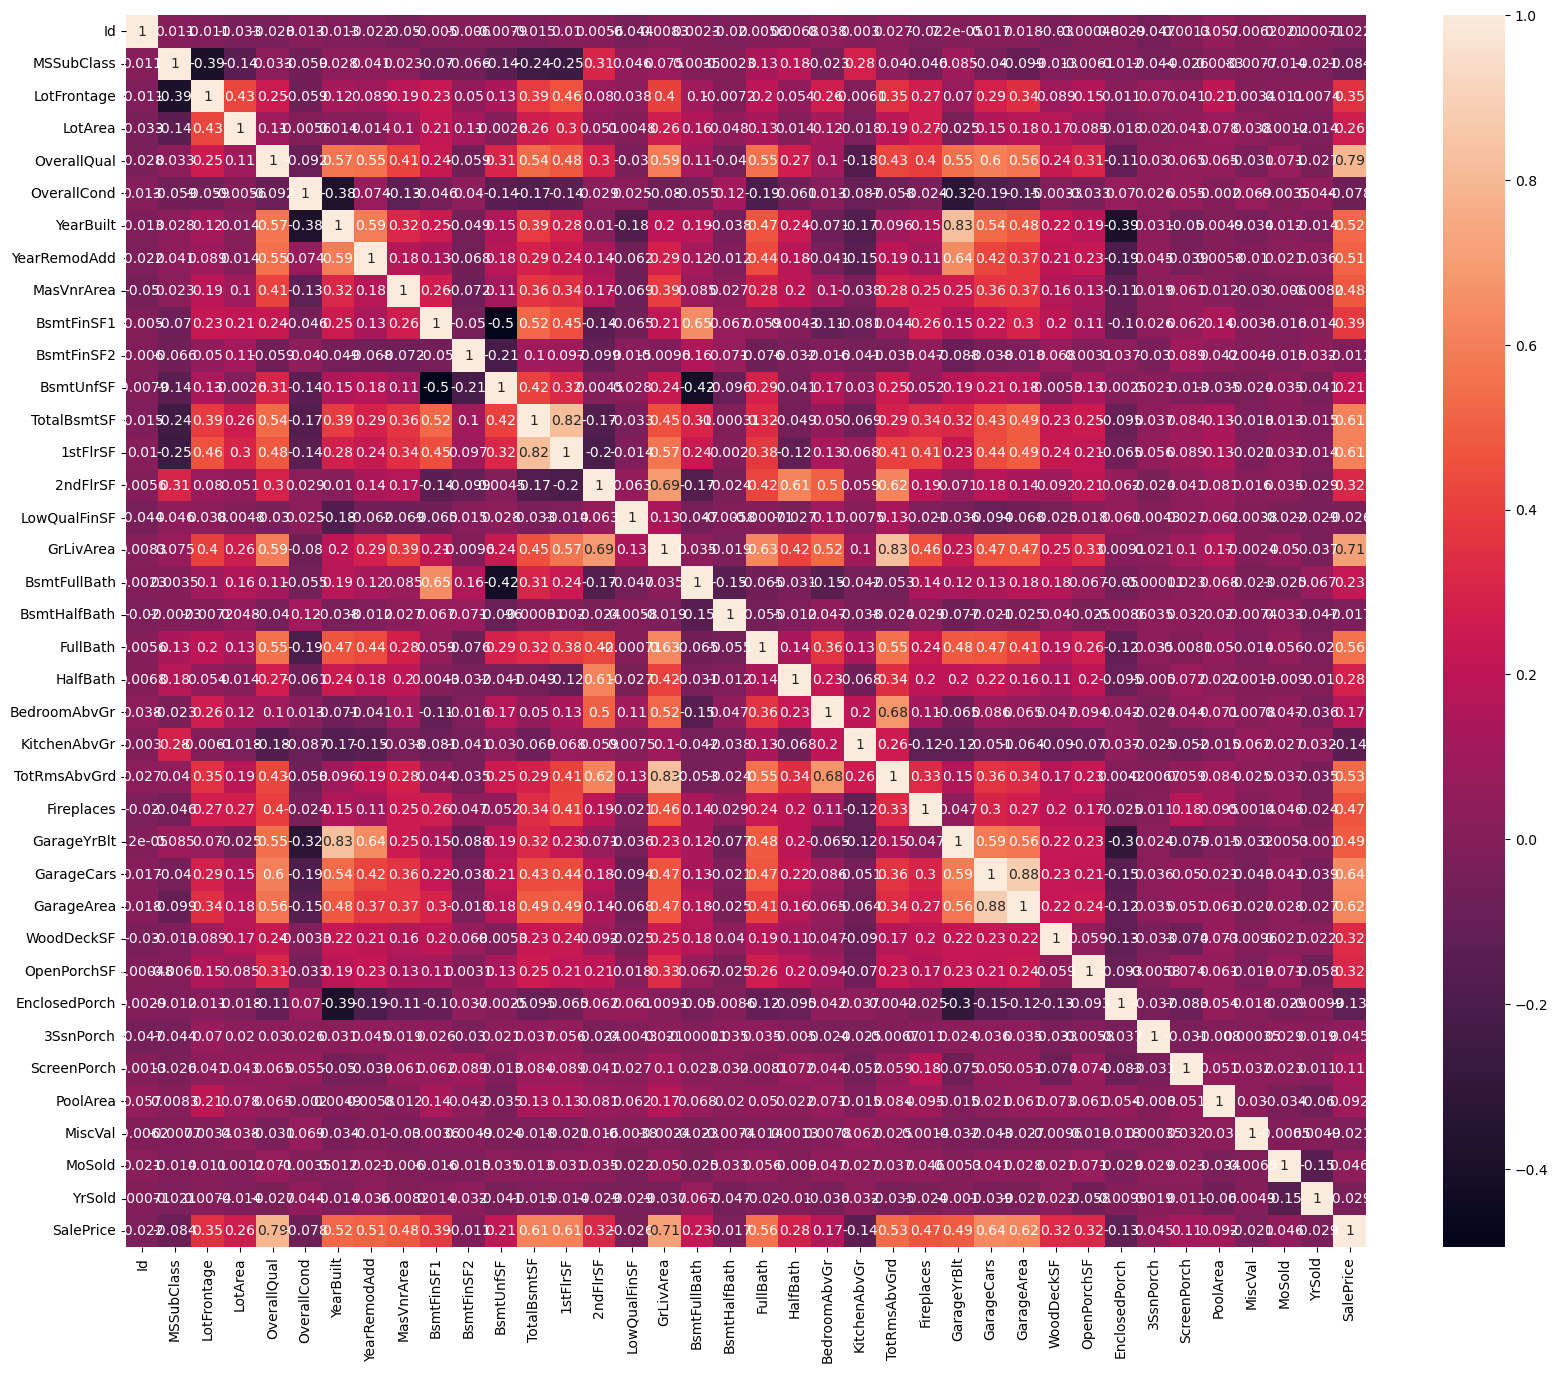

In [16]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

**Observations:**
- Correlation matrix analysis shows some of the features have high correlation with each other, one feature from each of the following pairs with high correlation can be dropped:
    * `GarageCars` and `GarageArea` (0.88)
    * `GarageYrBlt` and `YearBuilt` (0.83)
    * `TotRmsAbvGrd` and `GrLivArea` (0.83)
    * `TotalBsmtSF` and `1stFlrSF` (0.82)

#### Univariate and Bivariate Analysis - Numerical Features

In [17]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
numeric_df.columns.shape

(38,)

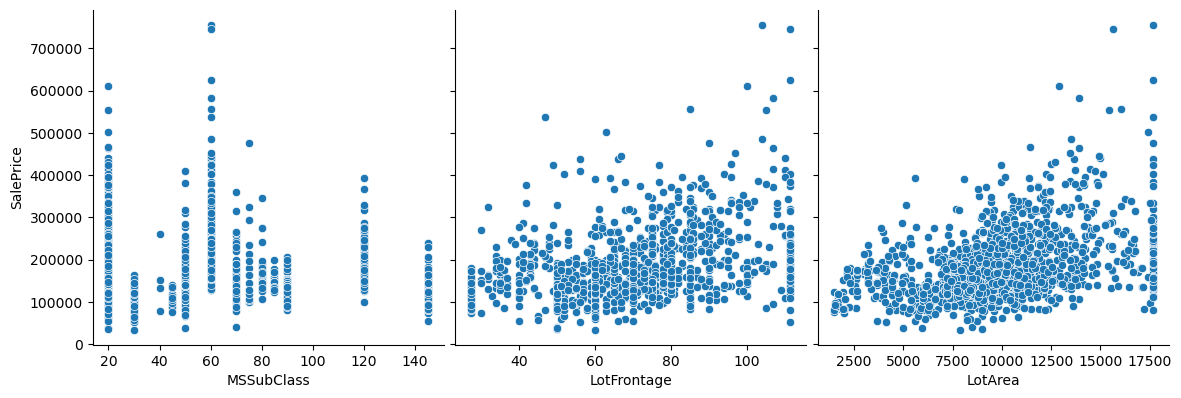

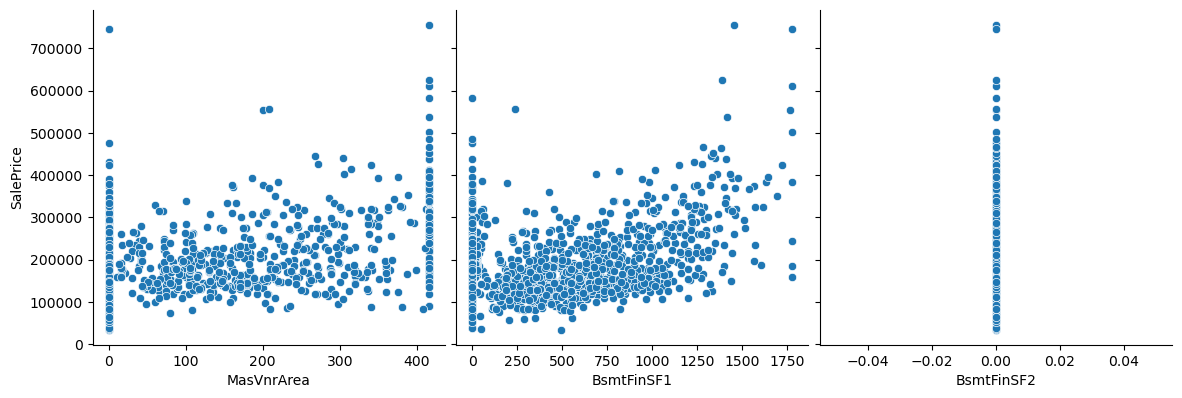

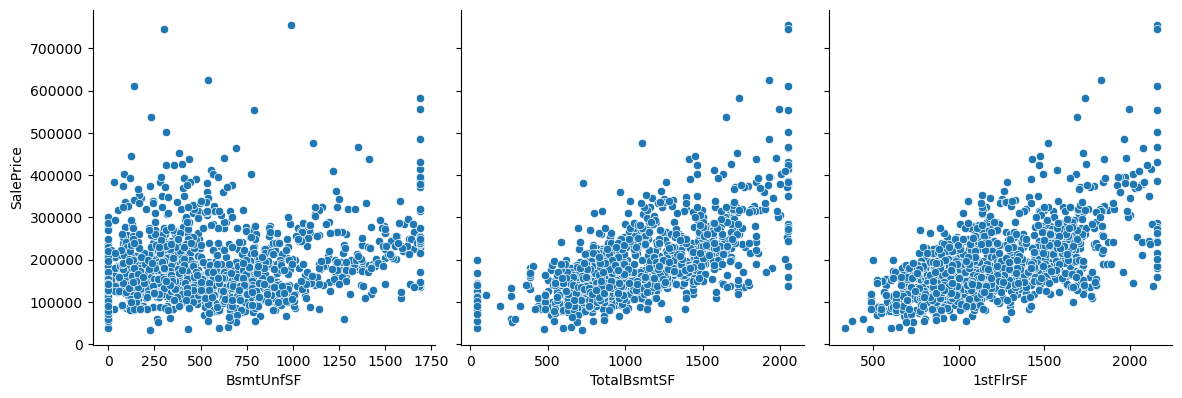

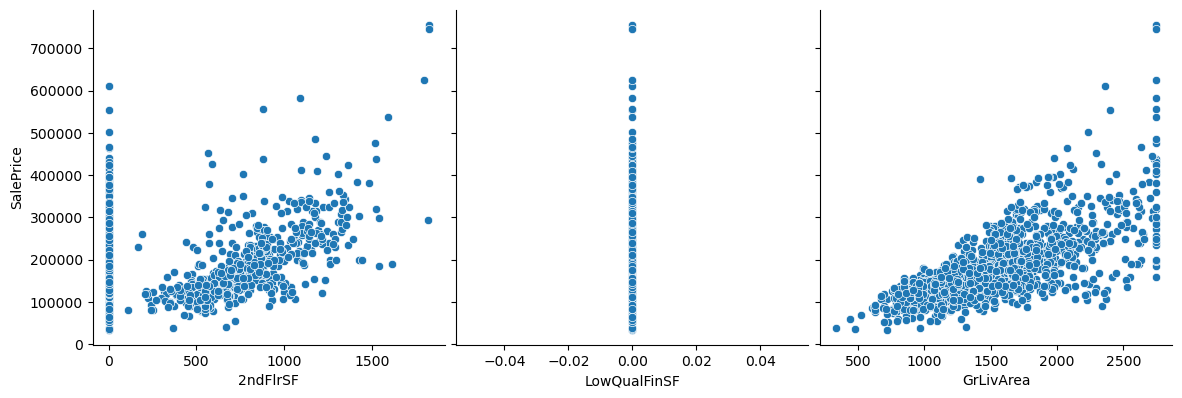

In [19]:
#function to plot scatter plot numeric variables with price

def pp(a,b,c):
    sns.pairplot(housing_df, x_vars=[a,b,c], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

# Plot scatter plot numeric variables with price
pp('MSSubClass', 'LotFrontage', 'LotArea')
pp('MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2')
pp('BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF')
pp('2ndFlrSF', 'LowQualFinSF', 'GrLivArea')

**Observations:**

- Features like `LotFrontage`, `LotArea`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea` are showing positive correlation with SalePrice.
- `MSSubClass` has discrete values
- `BsmtSF2`, `LowQualFinSf` has single value and can be dropped.

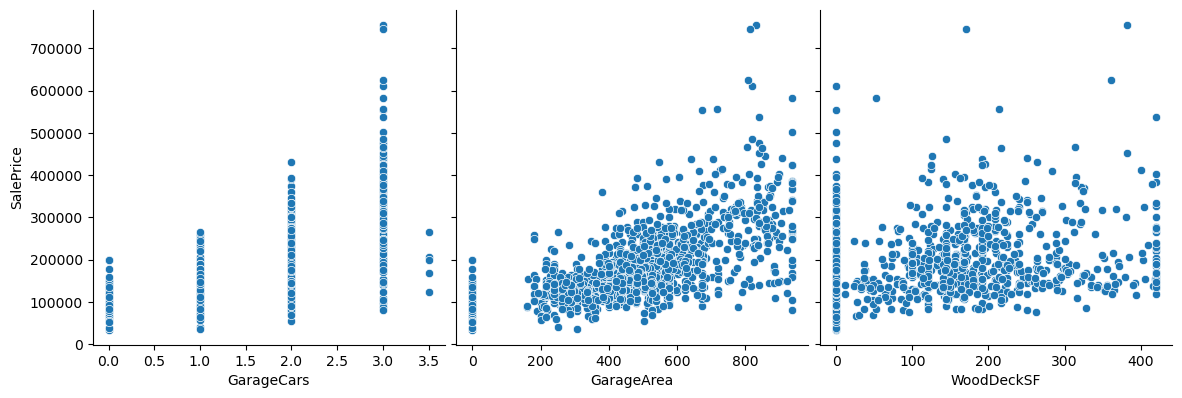

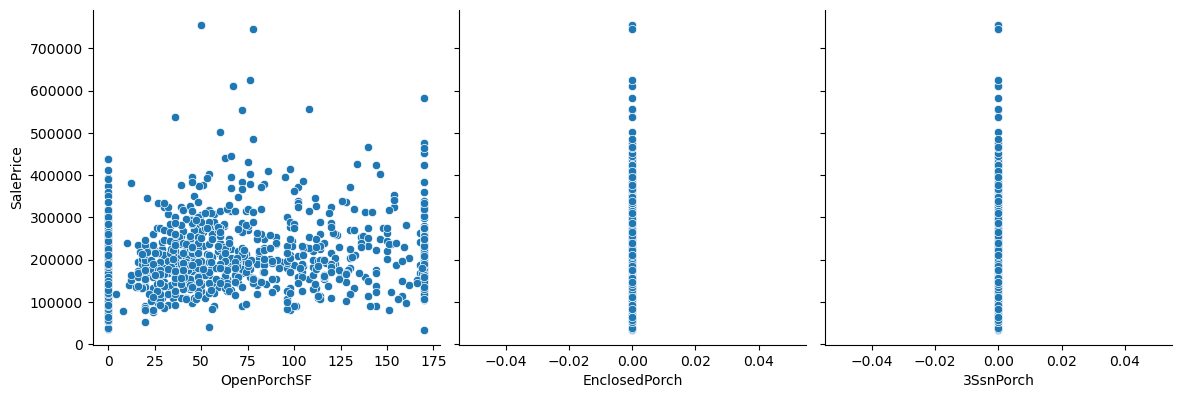

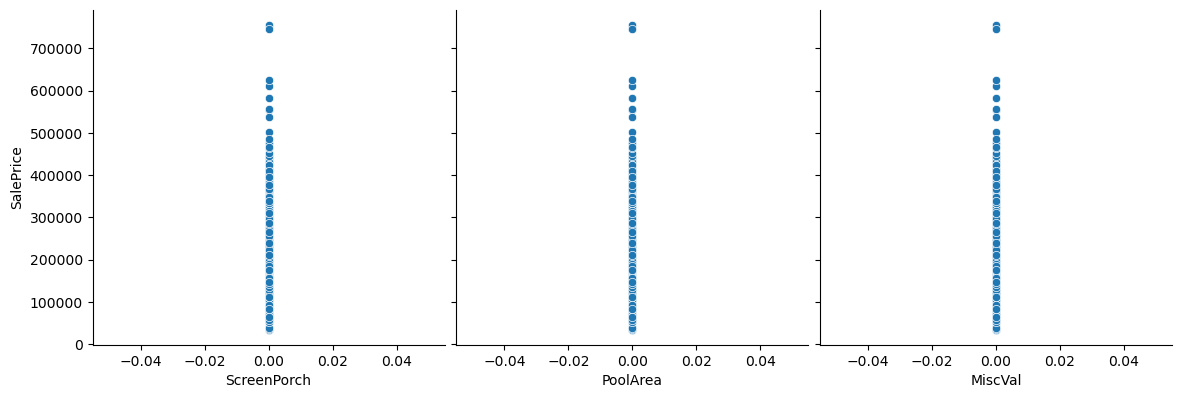

In [20]:
# Plot scatter plot numeric variables with price
pp('GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch')
pp('ScreenPorch', 'PoolArea', 'MiscVal')

**Observation**
- `GarageArea` are showing positive correlation with SalePrice.
- `LowQualFinSF`,`EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal` features have single values and can be dropped.

#### Correlation bar chart between the numeric features to Sale Price

In [21]:
# we drop Id (not relevant)
corr = numeric_df.drop(["Id"], axis=1).corr()

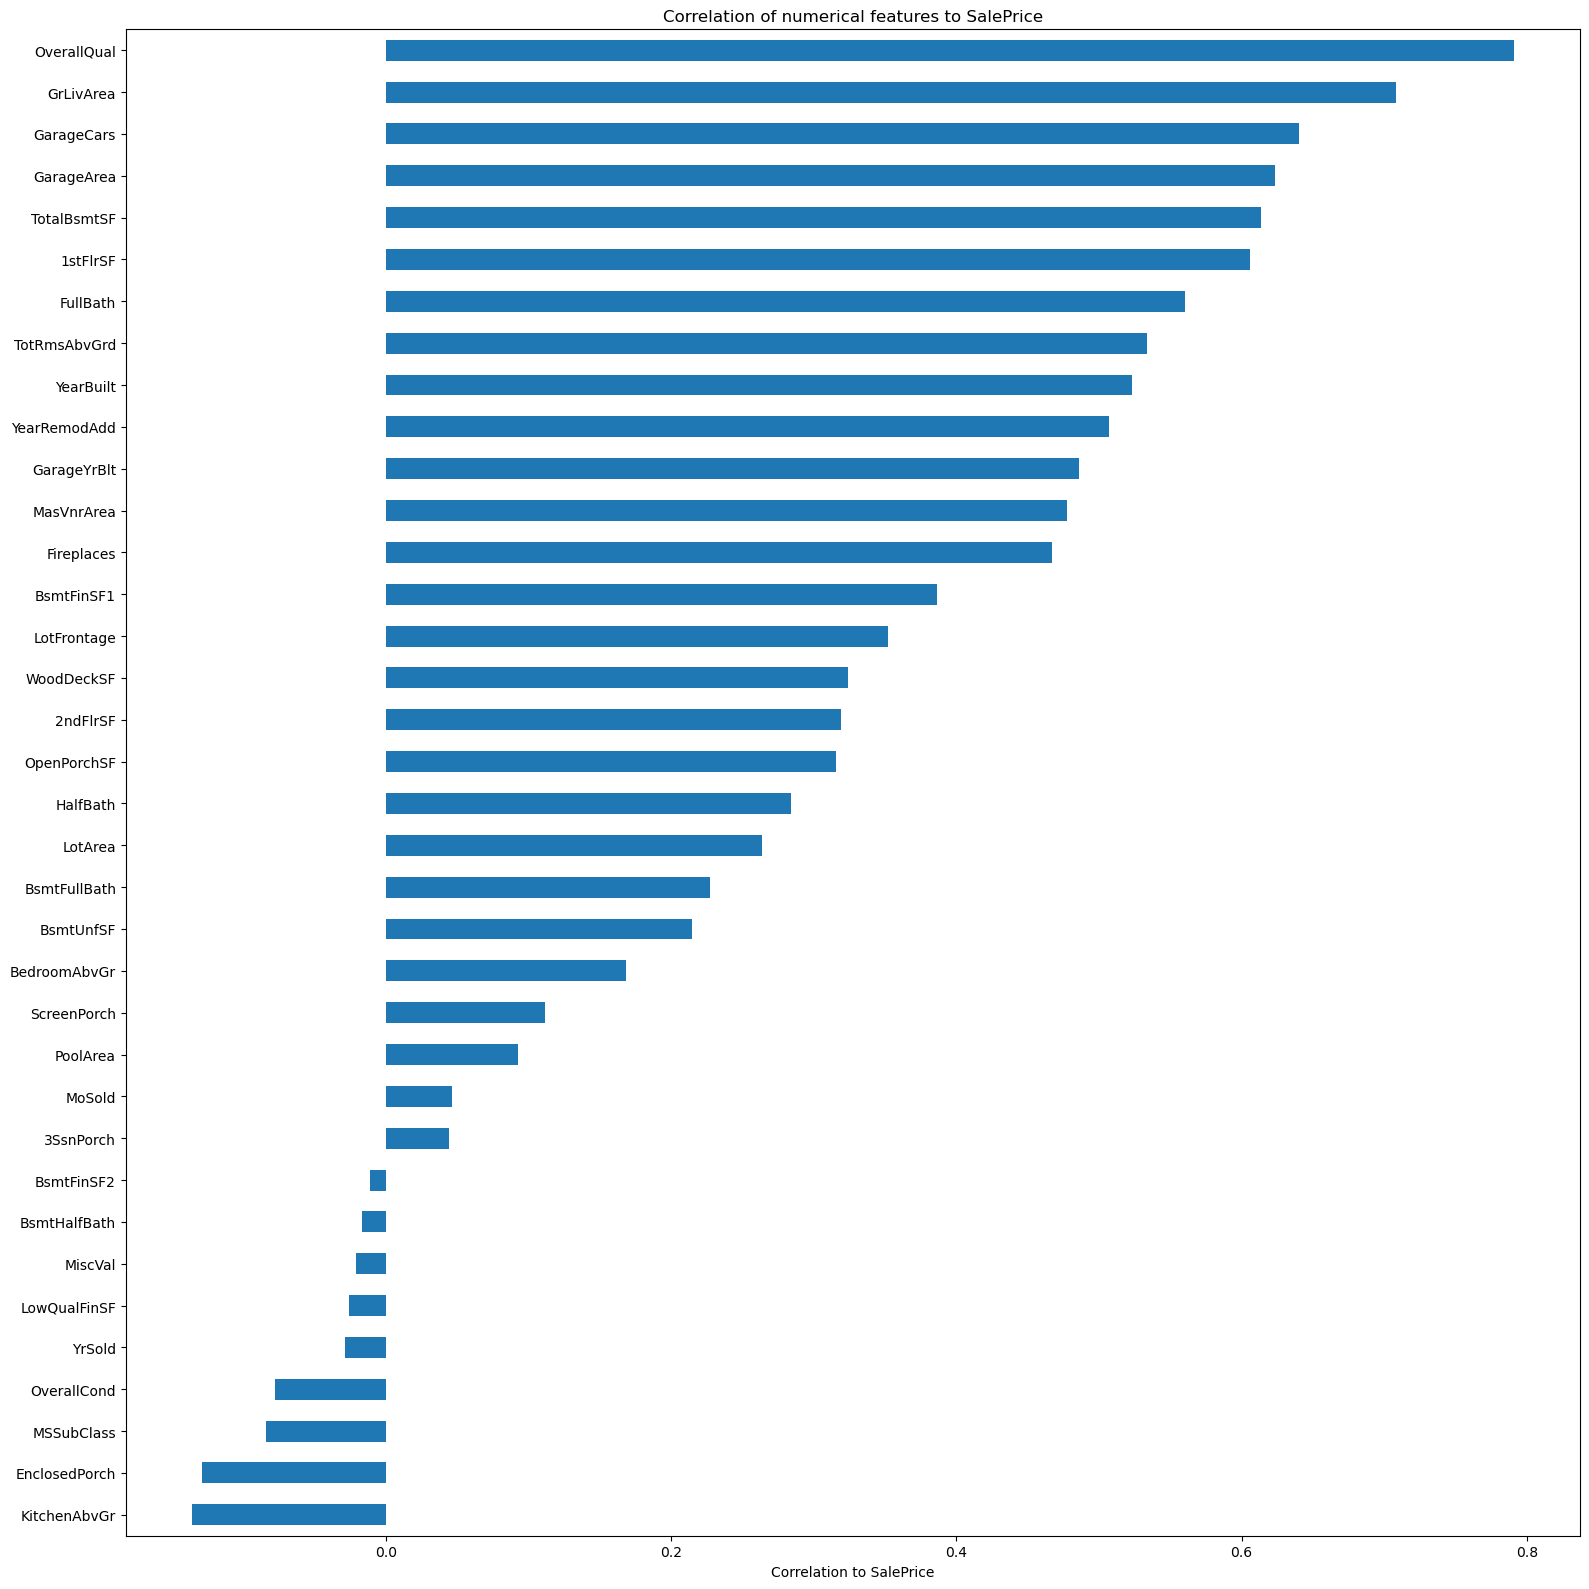

In [22]:
# Plot the correlation bar chart between the numeric features to Sale Price

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

In [23]:
# Display all columns in data frame
pd.set_option('display.max_columns', None)

# Checking the numerical feature dataset minmum and maximum values
housing_df[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


**Observations**
- `BsmtFinSF2`, `LowQualFinSF`, `BsmtHalfBath`, `KitchenAbvGr`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal` - These numerical features having single values as they won't contribute in predicting `SalePrice`
- Hence these features can be removed
- We can remove `Id` since it is not relevant

In [24]:
# Removing these features having fixed values as they won't contribute in predicting SalePrice
housing_df.drop(['Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [25]:
# Checking the remaining columns
print(housing_df.columns)
print(housing_df.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'M

#### Analyzing Numerical Features with Discrete Values

In [26]:
# Checking the numerical feature with discrete values
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath',
            'FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces',
            'GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,2,1,3.0,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,2,0,3.0,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,2,1,3.0,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,1,0,3.0,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,2,1,4.0,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,2,1,3.0,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,2,0,3.0,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,2,0,4.0,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,1,0,2.0,5,0.0,1950.0,1950,1996


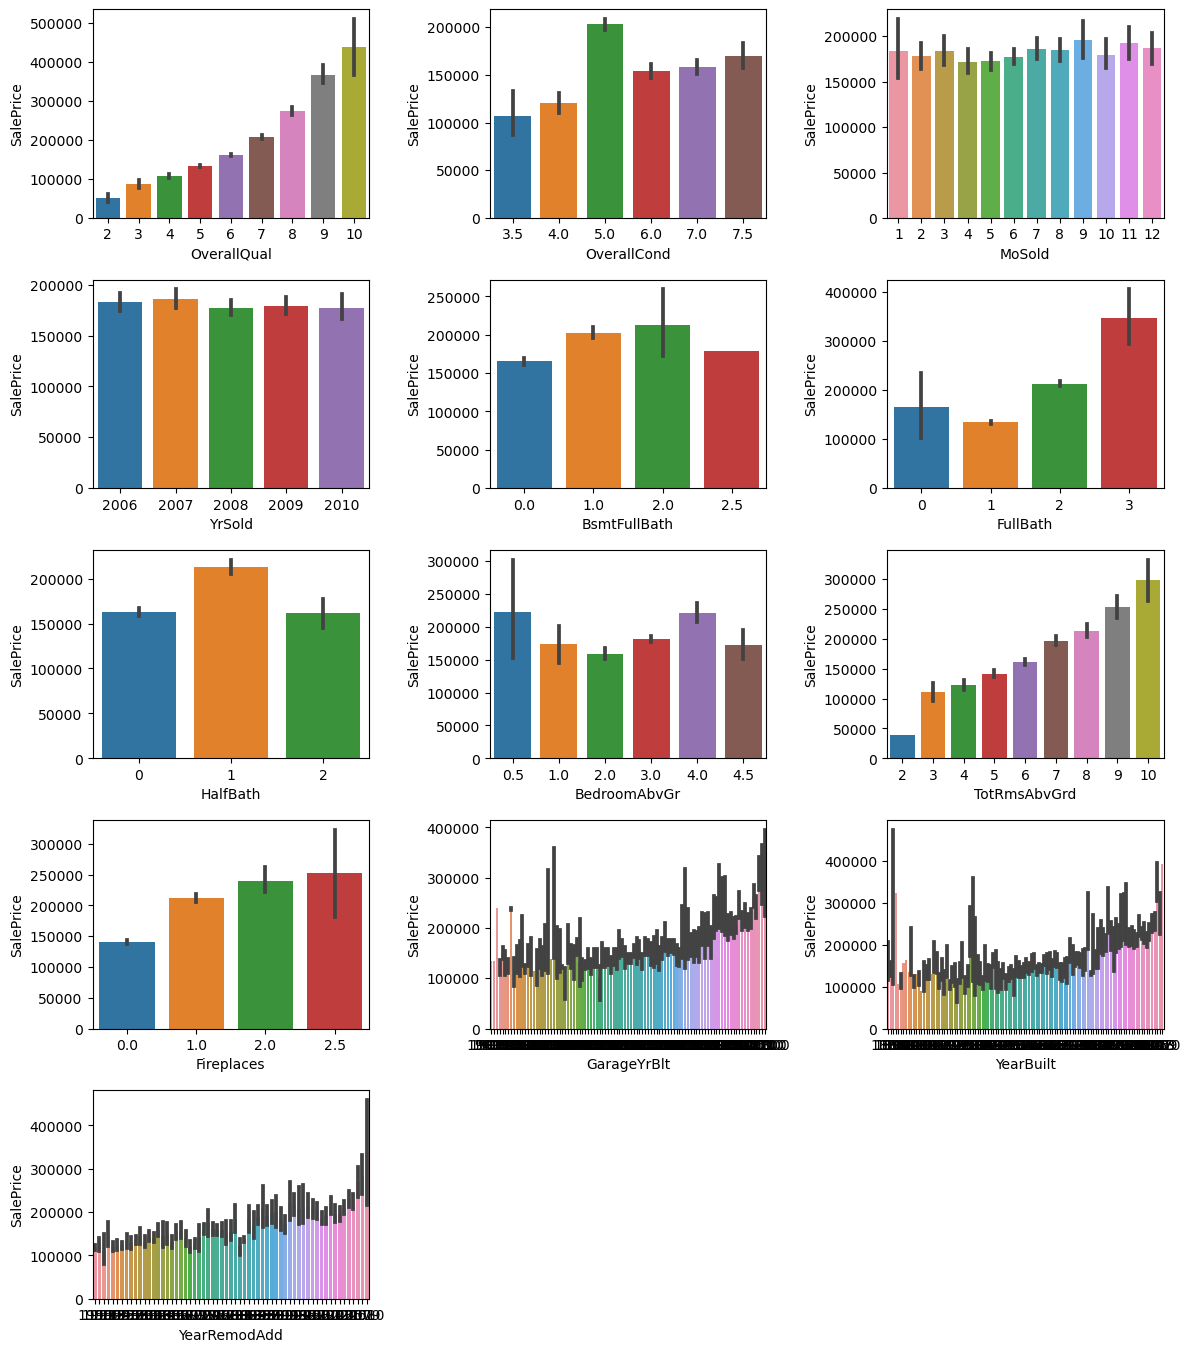

In [27]:
fig=plt.subplots(figsize=(12, 24))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath',
            'FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces',
            'GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

**Observations**
- `OverallQual` shows strong positive correlation with `SalePrice`
- `SalePrice` is high in `OverallCount` rating 5
- `MoSold` , `YrSold` does not show any strong trend with `SalePrice`
- `FullBath` = 2 and `HalfBath`=1 shows highest `SalePrice`
- `SalePrice` increase with increse in `TotRmsAbvGrd`. Shows strong correlation
- `SalePrice` is increasing with increasing number of `FirePlaces`

In [28]:
# Convert the year related data in to number of years
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

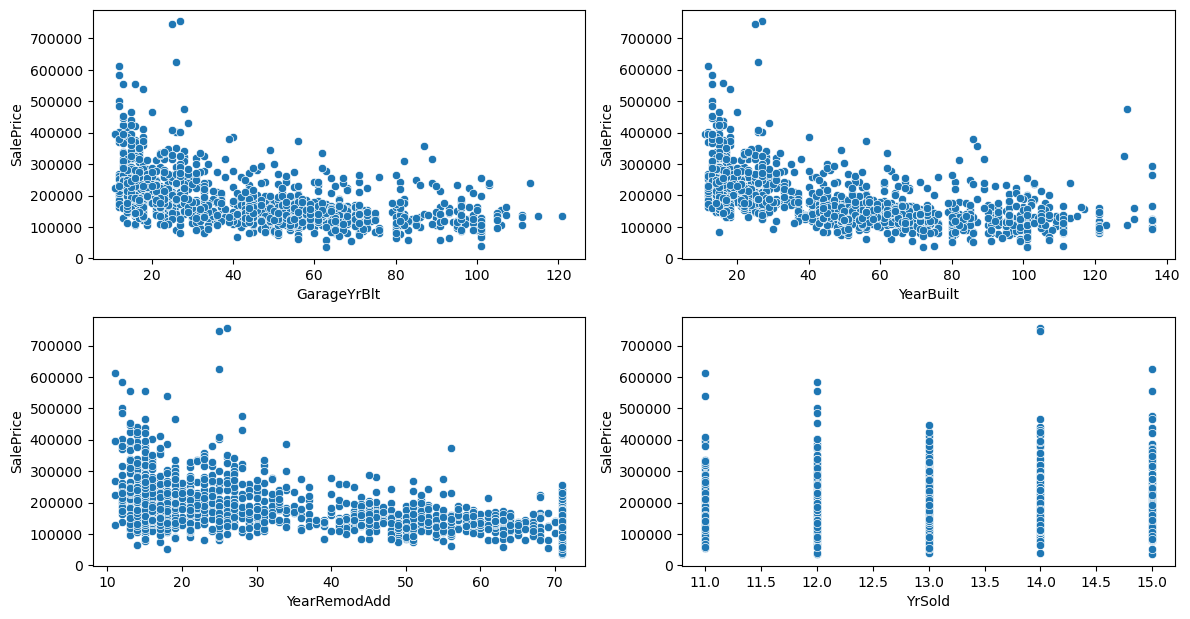

In [29]:
# Plot the scatter chart - Year related feature with SalePrice
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'])
    plt.tight_layout()

**Observations**
- Most of the Garage is build within last 20 years, `SalePrice` is high for recently build garages (Low values of `GatageYrBlt`).
- `SalePrice` is high for newly build houses (low values of `YearBuild`).
- Newly remodiffied houses (low values of `YearRemoAdd`) have higher `SalePrice`.
- `YrSold` does not show any significant trend.

####  Missing Value Handling - Numerical Features

In [30]:
# Finding the missing values in each numeric feature columns
print("Feature : Percentage of Missing Value")
for feat in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ' : ',  round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


**Observations**
- Since `MasVnrArea` has only 0.5% data missing, we can drop the rows with NULL values in `MasVnrArea`
-  Missing Value Imputation to be done for `LotFrontage` after splitting data into train and test set to avoid data leakage.

In [31]:
# Droping the row with null values in MasVnrArea
housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]

In [32]:
# Checking the number of remaining columns
housing_df.columns.shape

(71,)

**Observations**
- `GarageCars` and `GarageArea` (Correlation coefficient = 0.88), dropping `GarageCars`
- `GarageYrBlt` and `YearBuilt` (Correlation coefficient = 0.83), dropping `GarageYrBlt` for high correlation and containing missing value
- `TotRmsAbvGrd` and `GrLivArea` (Correlation coefficient = 0.83), dropping `GrLivArea`
- `TotalBsmtSF` and `1stflrSF` (Correlation coefficient = 0.82), dropping `TotalBsmtSF`

In [33]:
# Dropping the 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF' columns
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

In [34]:
# Checking the number of remaining columns
print(housing_df.columns.shape)

(67,)


### Analyzing Categorical Features

In [35]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
categorical_df.shape

(1460, 43)

#### Missing Value Handling - Categorical Features

In [37]:
# Finding the missing values in each categorical feature columns

print("Feature : Percentage of Missing Value")
for feat in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
MasVnrType : 60.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


**Observations**
- For `Alley`, Nan means 'No access to alley'
- For `MasVnrType` Nan means 'No Masonry veneer area'
- For `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` Nan means 'No basement'
- For `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` Nan means 'No garage'
- For `FireplaceQu` and `Fence` Nan means 'No Fire place' and 'No fence' respectively
- For `MiscFeature` Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [38]:
# assign these categorical feature in to 'mv_categorical_features'
mv_categorical_features = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                           'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 
                           'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']


In [39]:
# Replace missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking null values after replacing
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [40]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [41]:
# Checking the missing values in the whole data set
print("Feature : Percentage of Missing Value")
for feat in housing_df.columns:
    if housing_df[feat].isnull().any():
        print(feat, ':', round(housing_df[feat].isnull().sum()/housing_df.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


**Observations**
- Missing Value Imputation to be done for `LotFrontage` after splitting data into train and test set to avoid data leakage.

In [42]:
housing_df.columns.shape

(66,)

### Analyzing Categorical Features

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

In [43]:
# Function to generate boxplot for SalePrice against different features

def gen_boxplot(feature_list):
    fig=plt.subplots(figsize=(25, 25))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(x=housing_df['SalePrice'], y=housing_df[feature])
        plt.tight_layout()

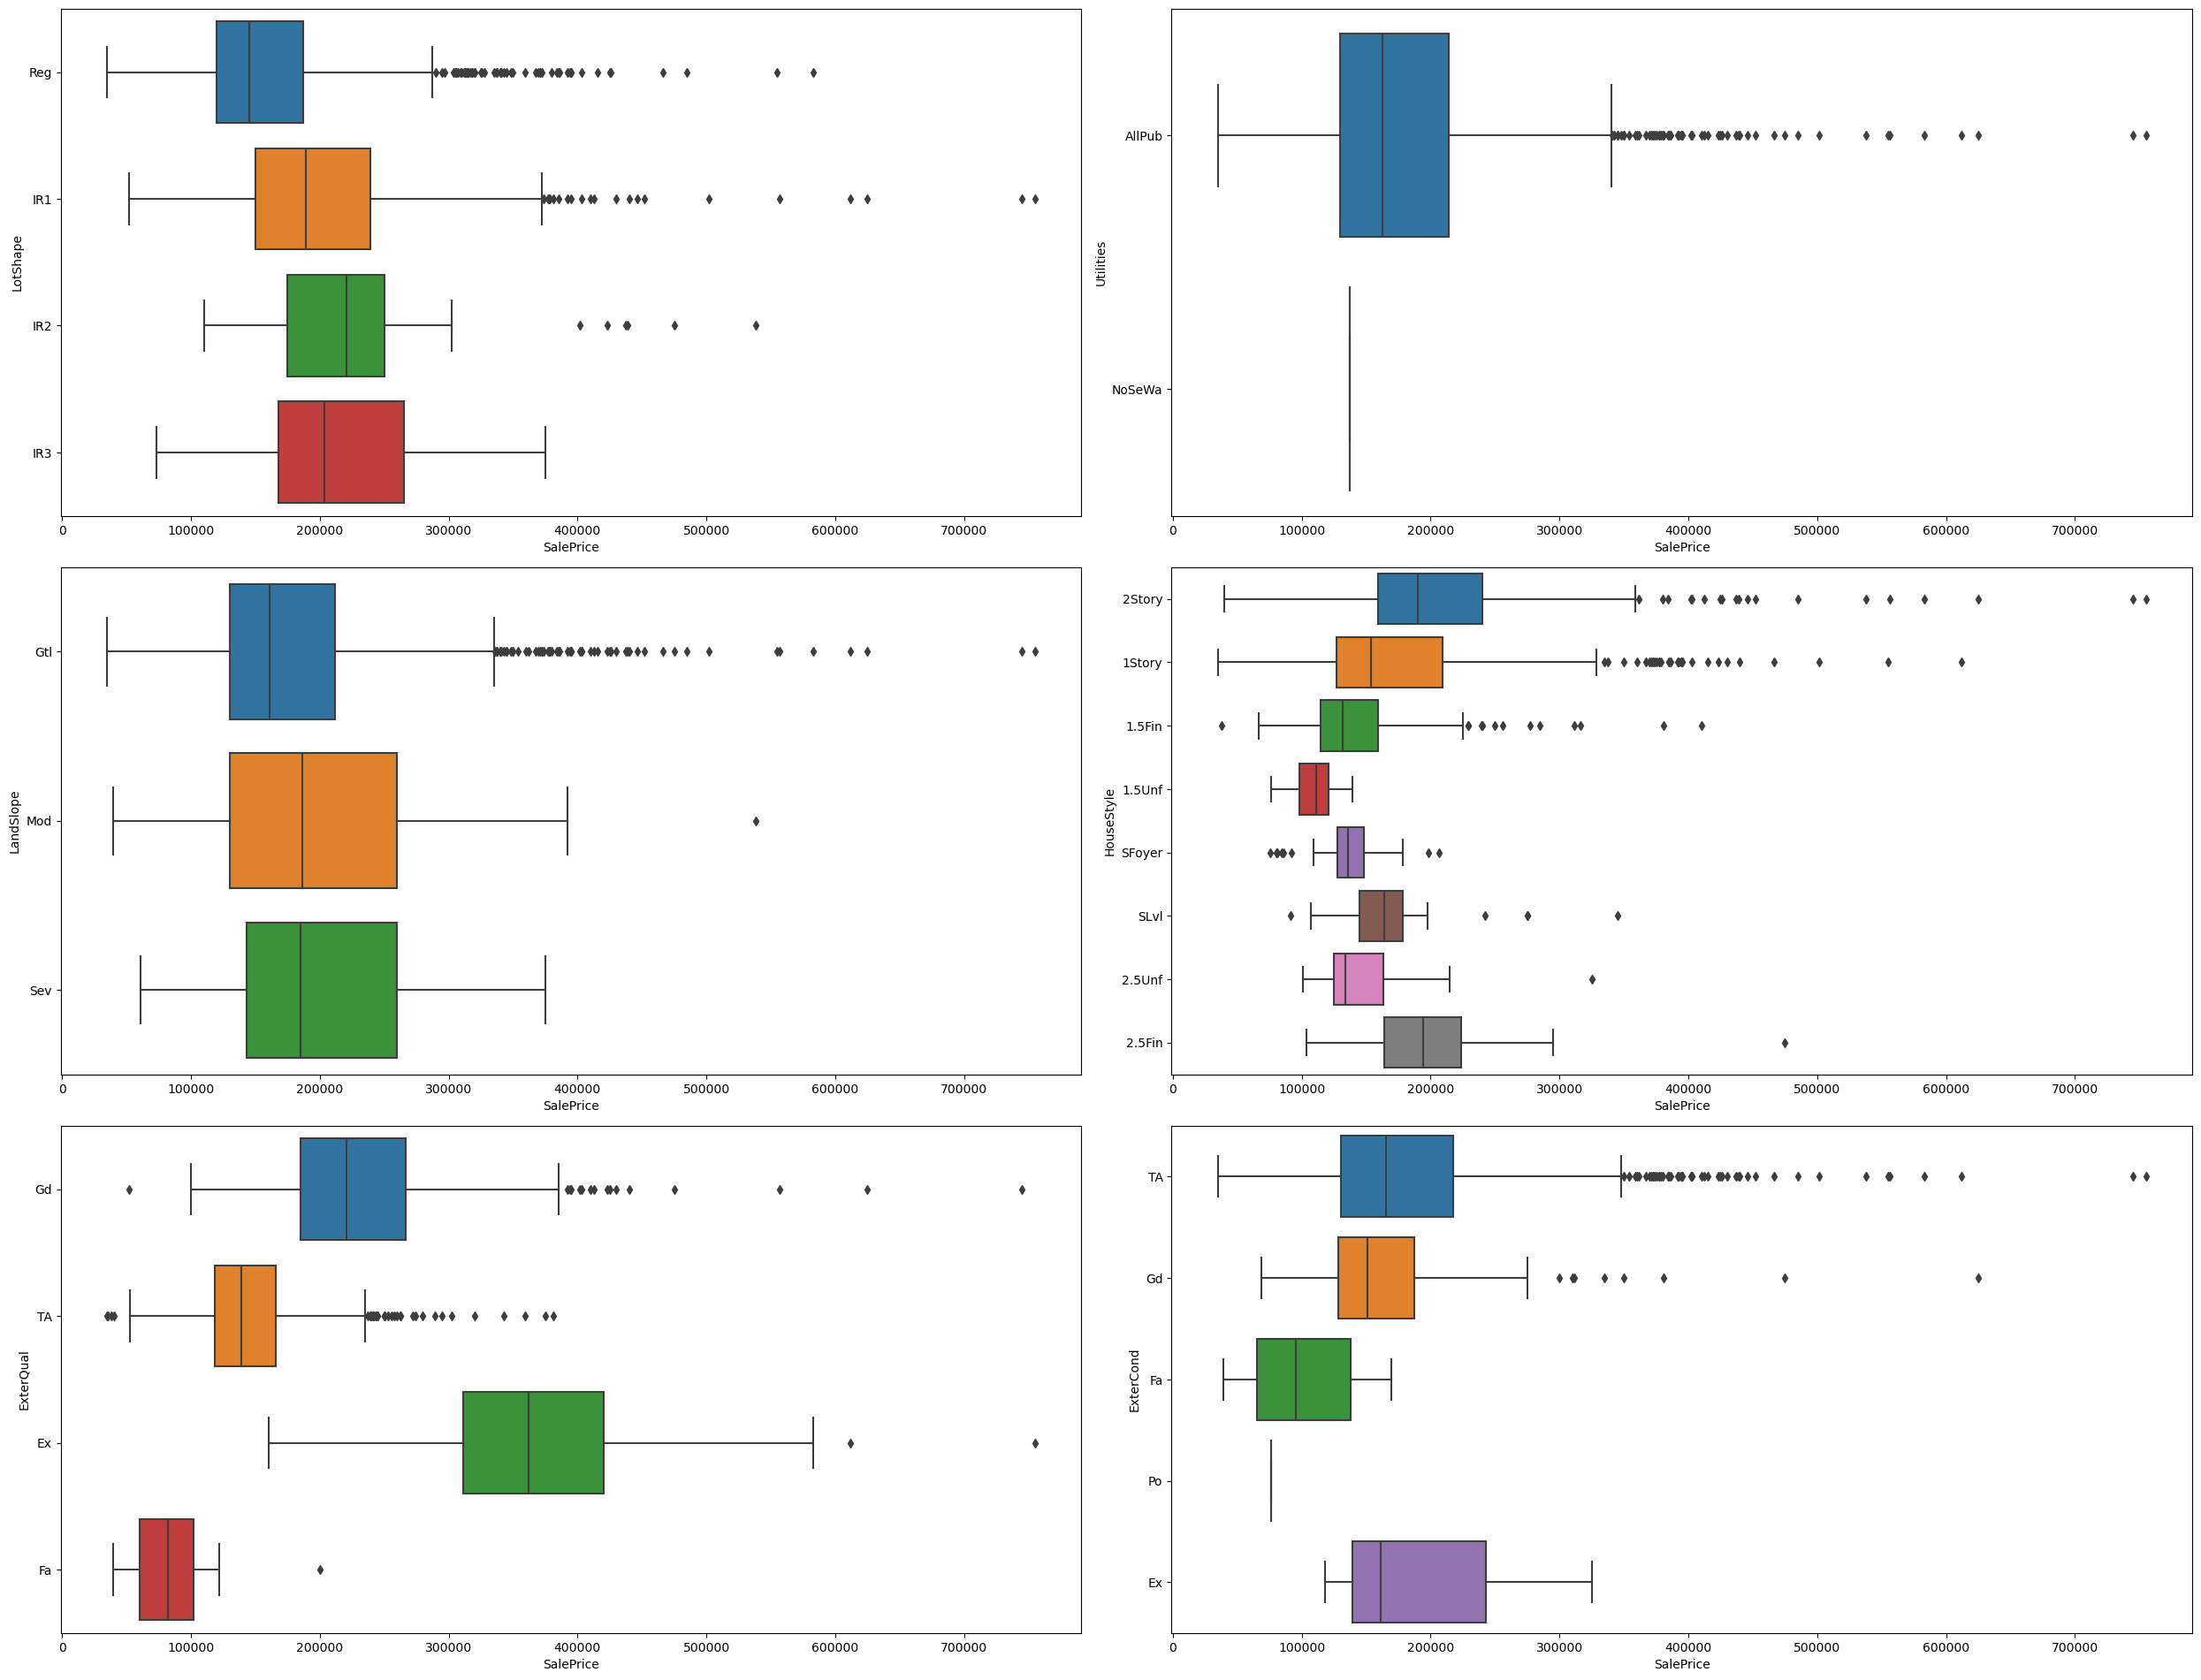

In [44]:
# list of feature 
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

# Call the function to generate boxplot
gen_boxplot(ext_features)

**Observations**
- `LotShape` : Slightly irregular shape of property have the highest SalePrice
- `Utilities` : Most of the houses in the dataset have all the public utilities
- `LandSlope` : Houses with gentle land slope have lowest SalePrice
- `HouseStyle` : 2 storied houses have the highest SalePrice
- `ExterQual` : Houses with Excellent quality of material on the exterior have the highest SalePrice
- `ExterCond` : Houses with Excellent condition of material on the exterior have the highest SalePrice

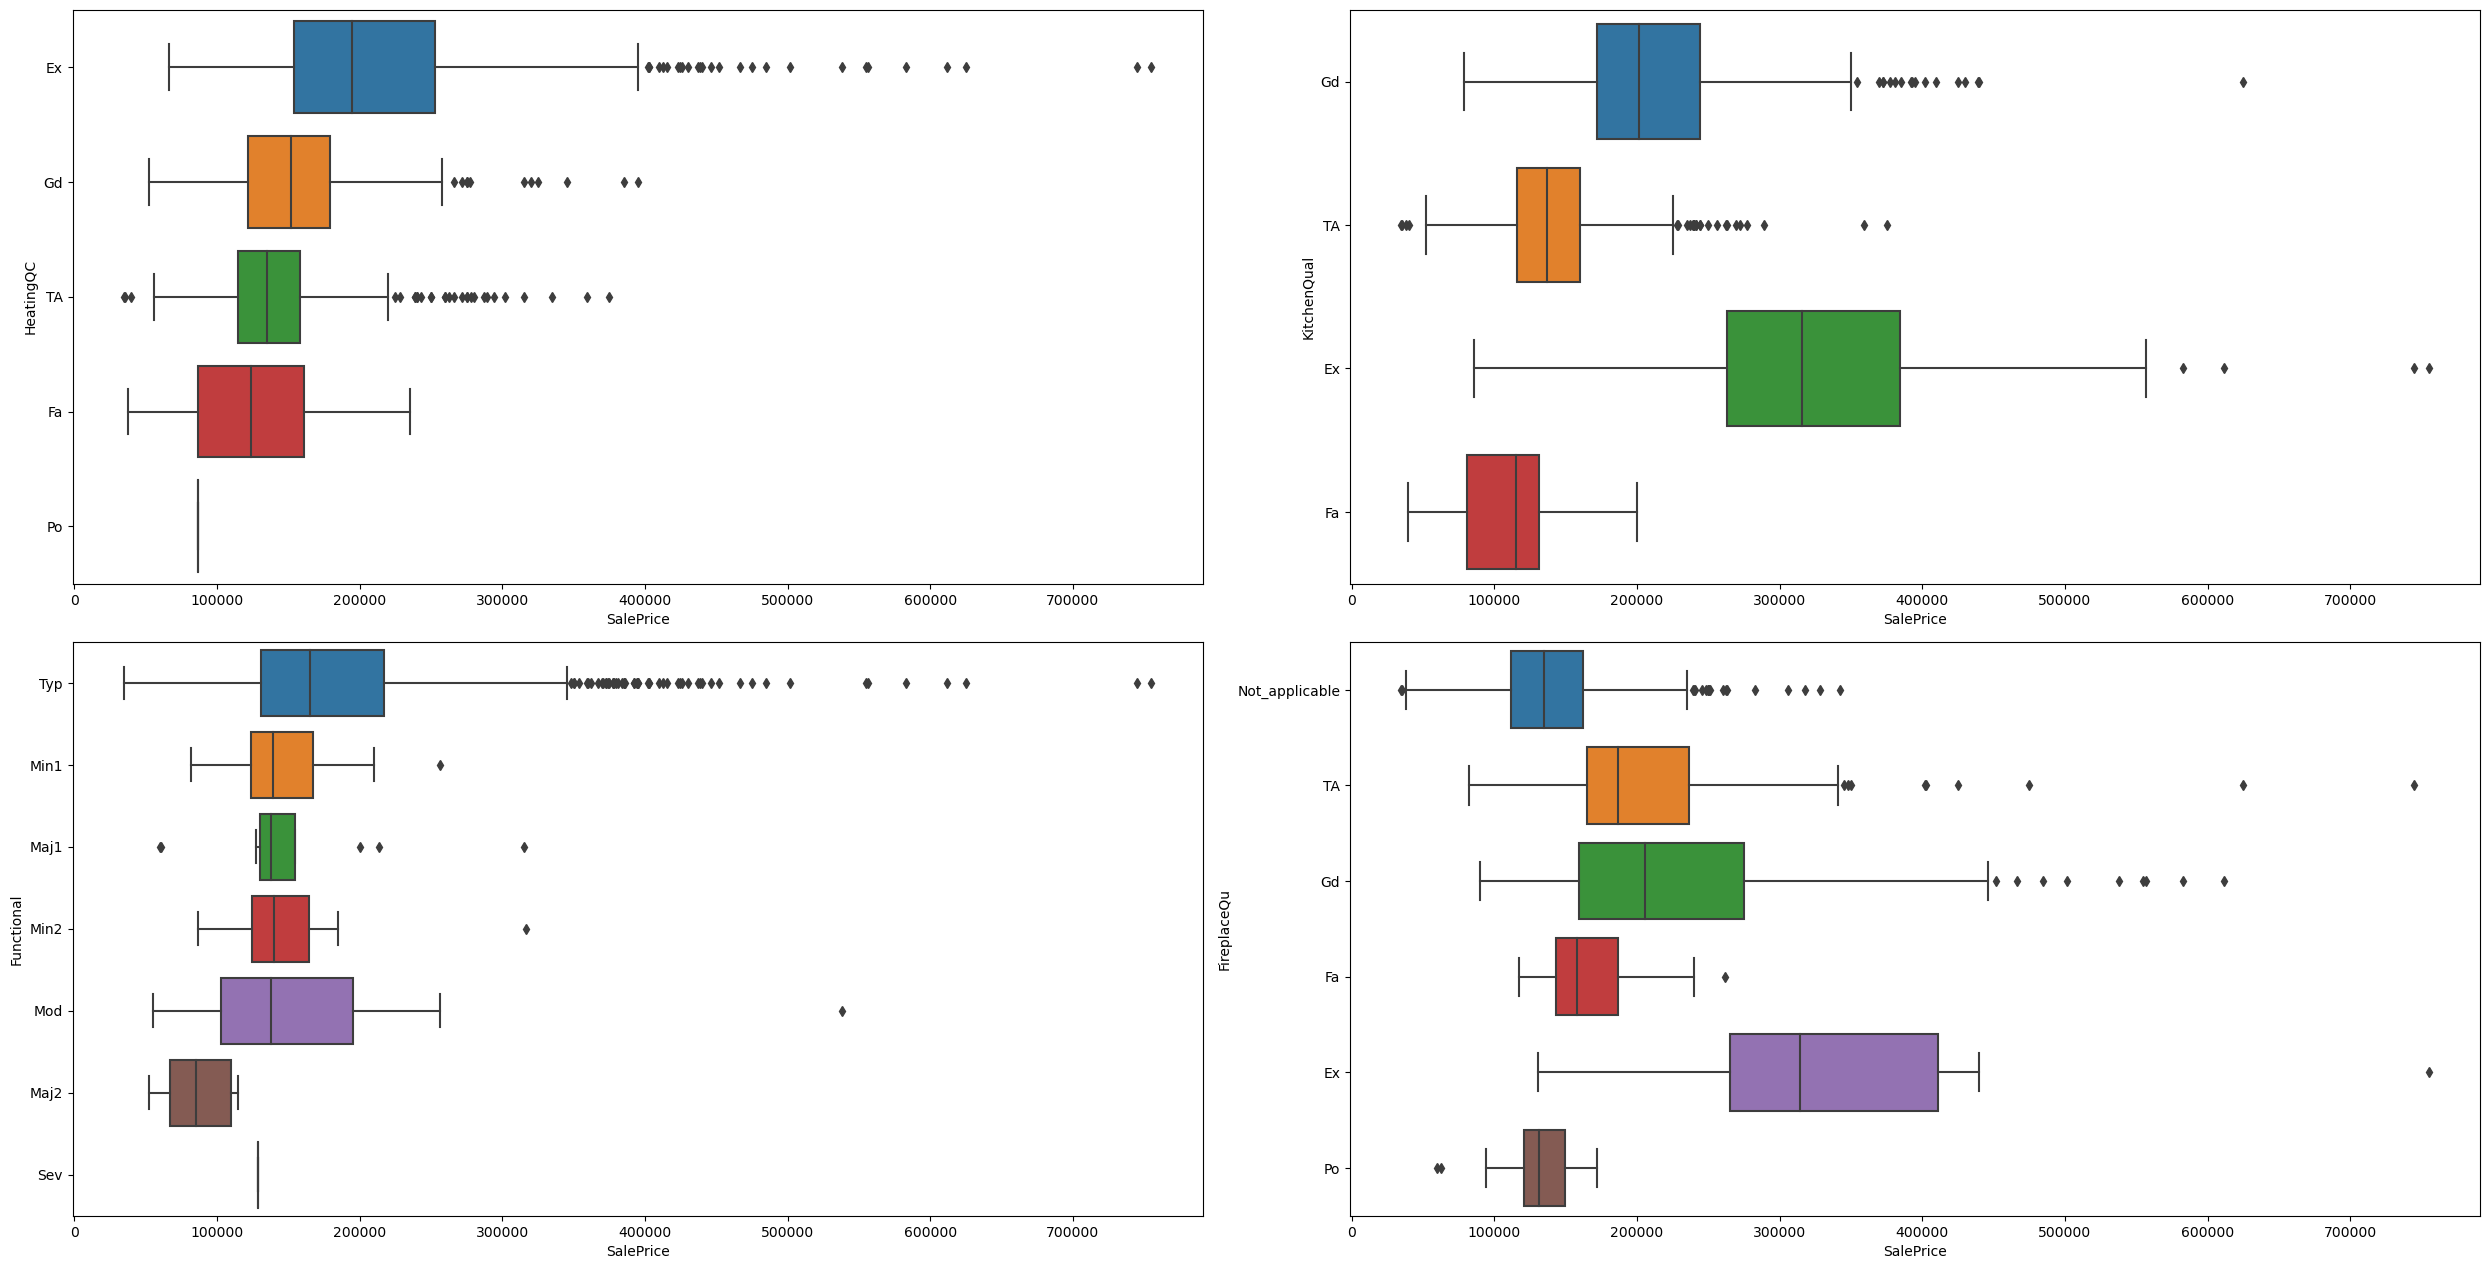

In [45]:
# list of feature 
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

# Call the function to generate boxplot
gen_boxplot(int_features)

**Observations**

- `HeatingQC`, `KitchenQual` : Houses having excellent heating quality and kitchen quality have the highest SalePrice
- `Functional` : Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- `FireplaceQu` : SalePrice range in largest for houses with average fireplace quality.

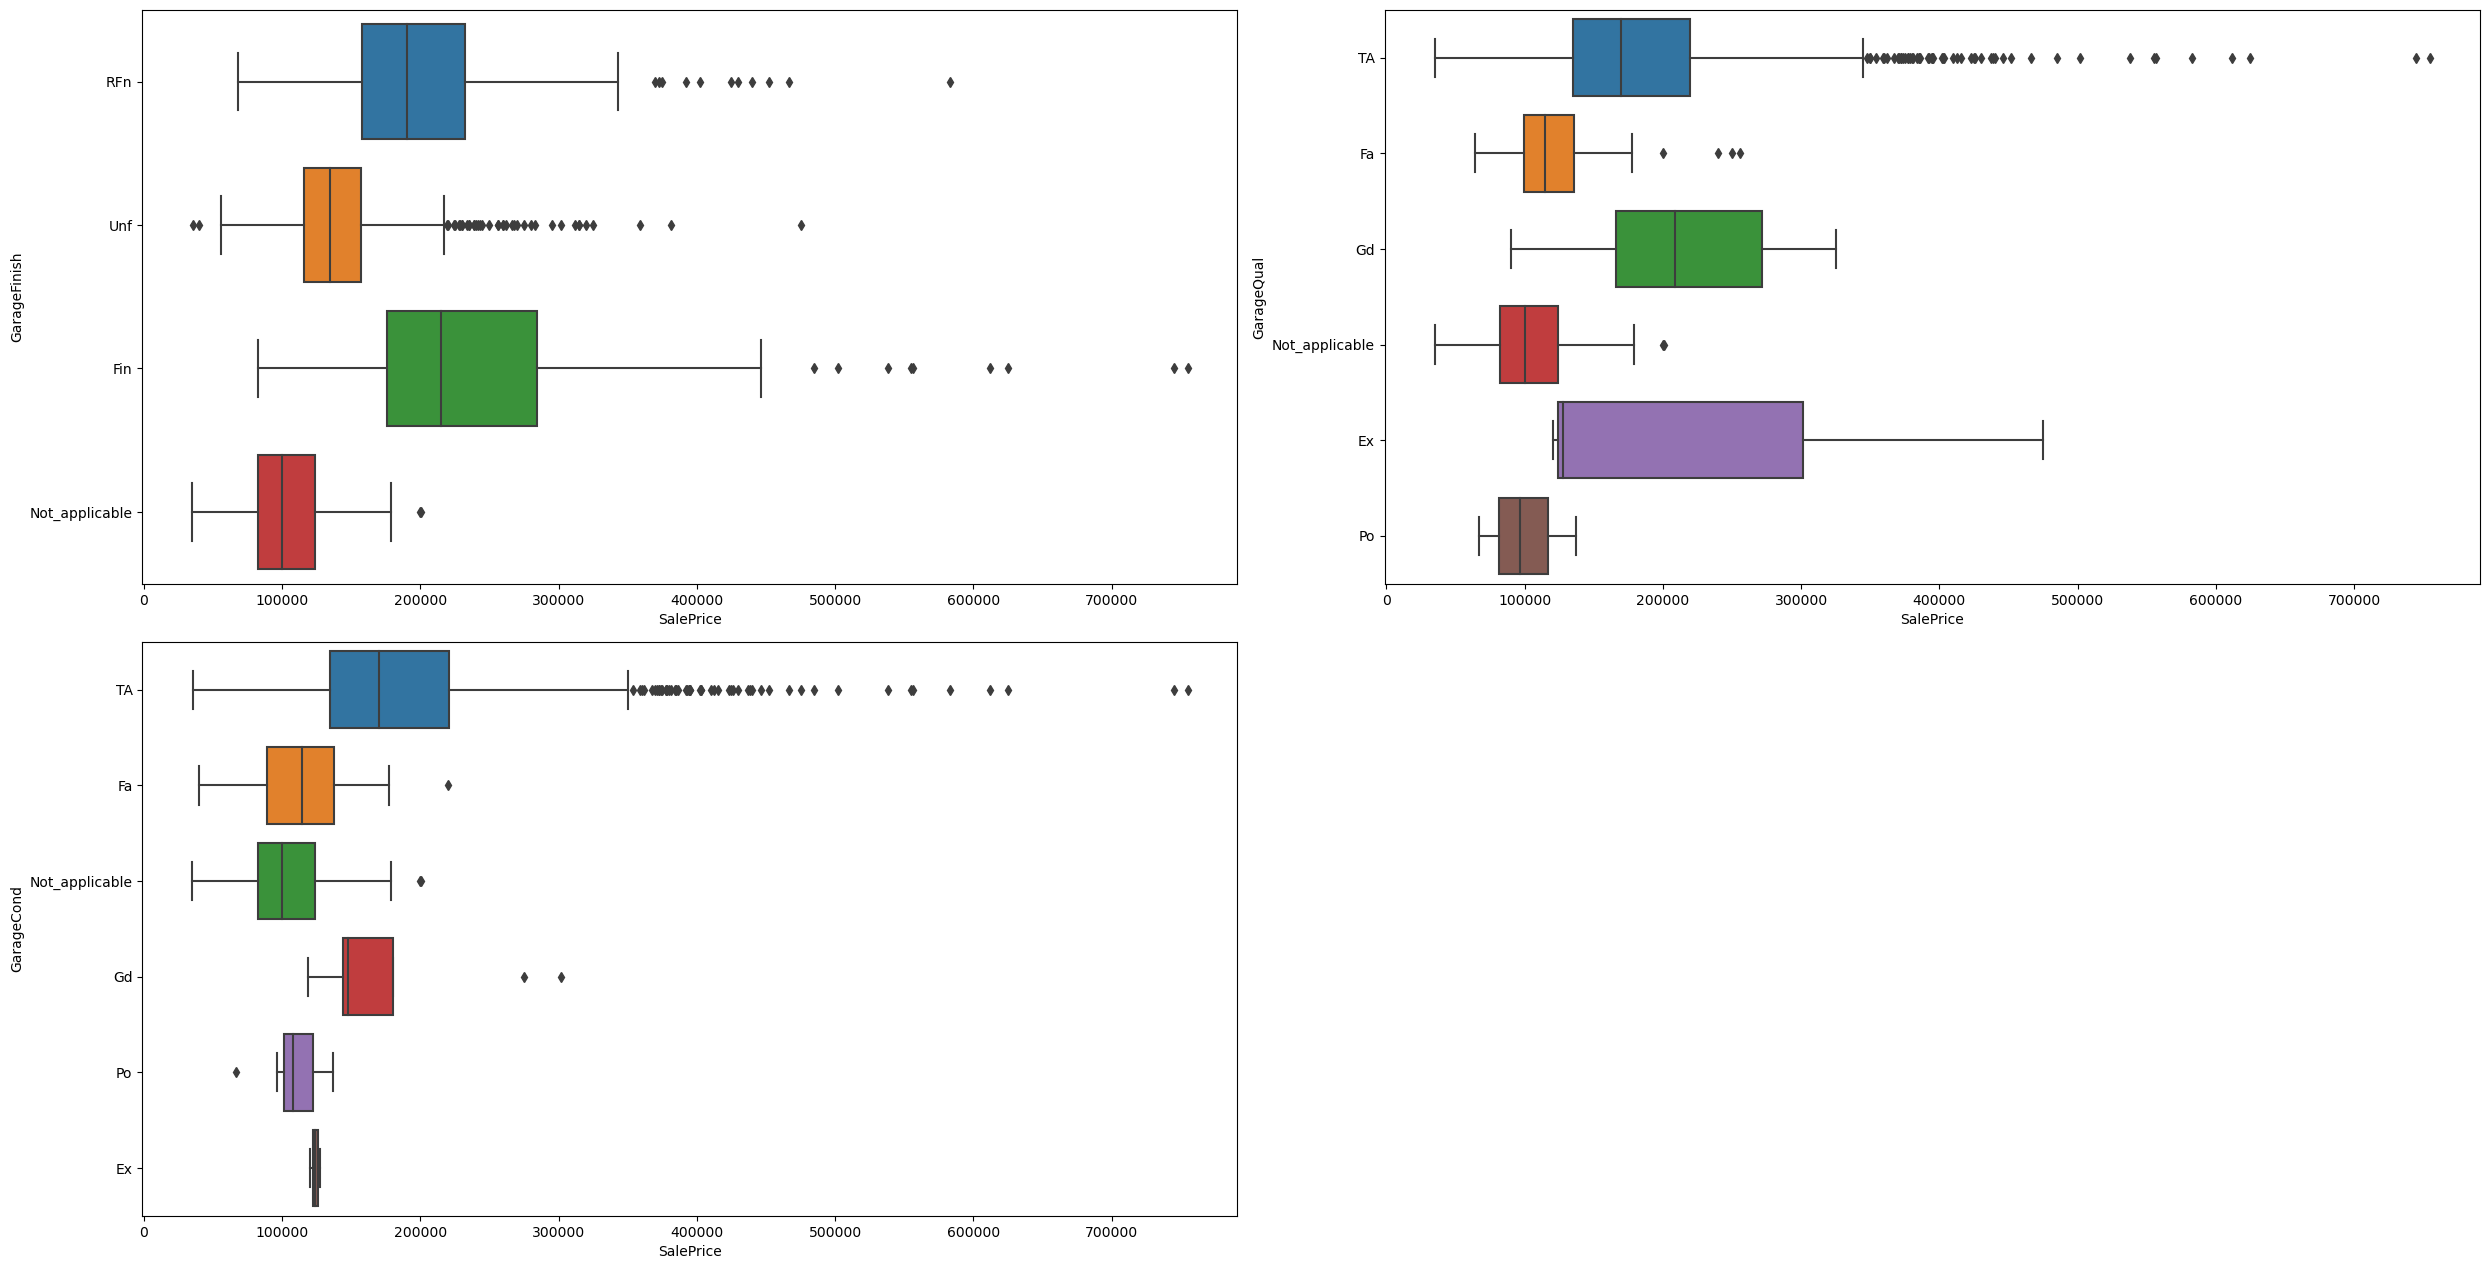

In [46]:
# list of feature 
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

# Call the function to generate boxplot
gen_boxplot(garage_features)

**Observations**

- `GarageFinish` : SalePrice is highest where garage is finished.
- `GarageQual` : The range of SalePrice is widest for Typical/Average Garage quality and condition.
- `GarageCond` : There are very few houses with excellect condition of garage.

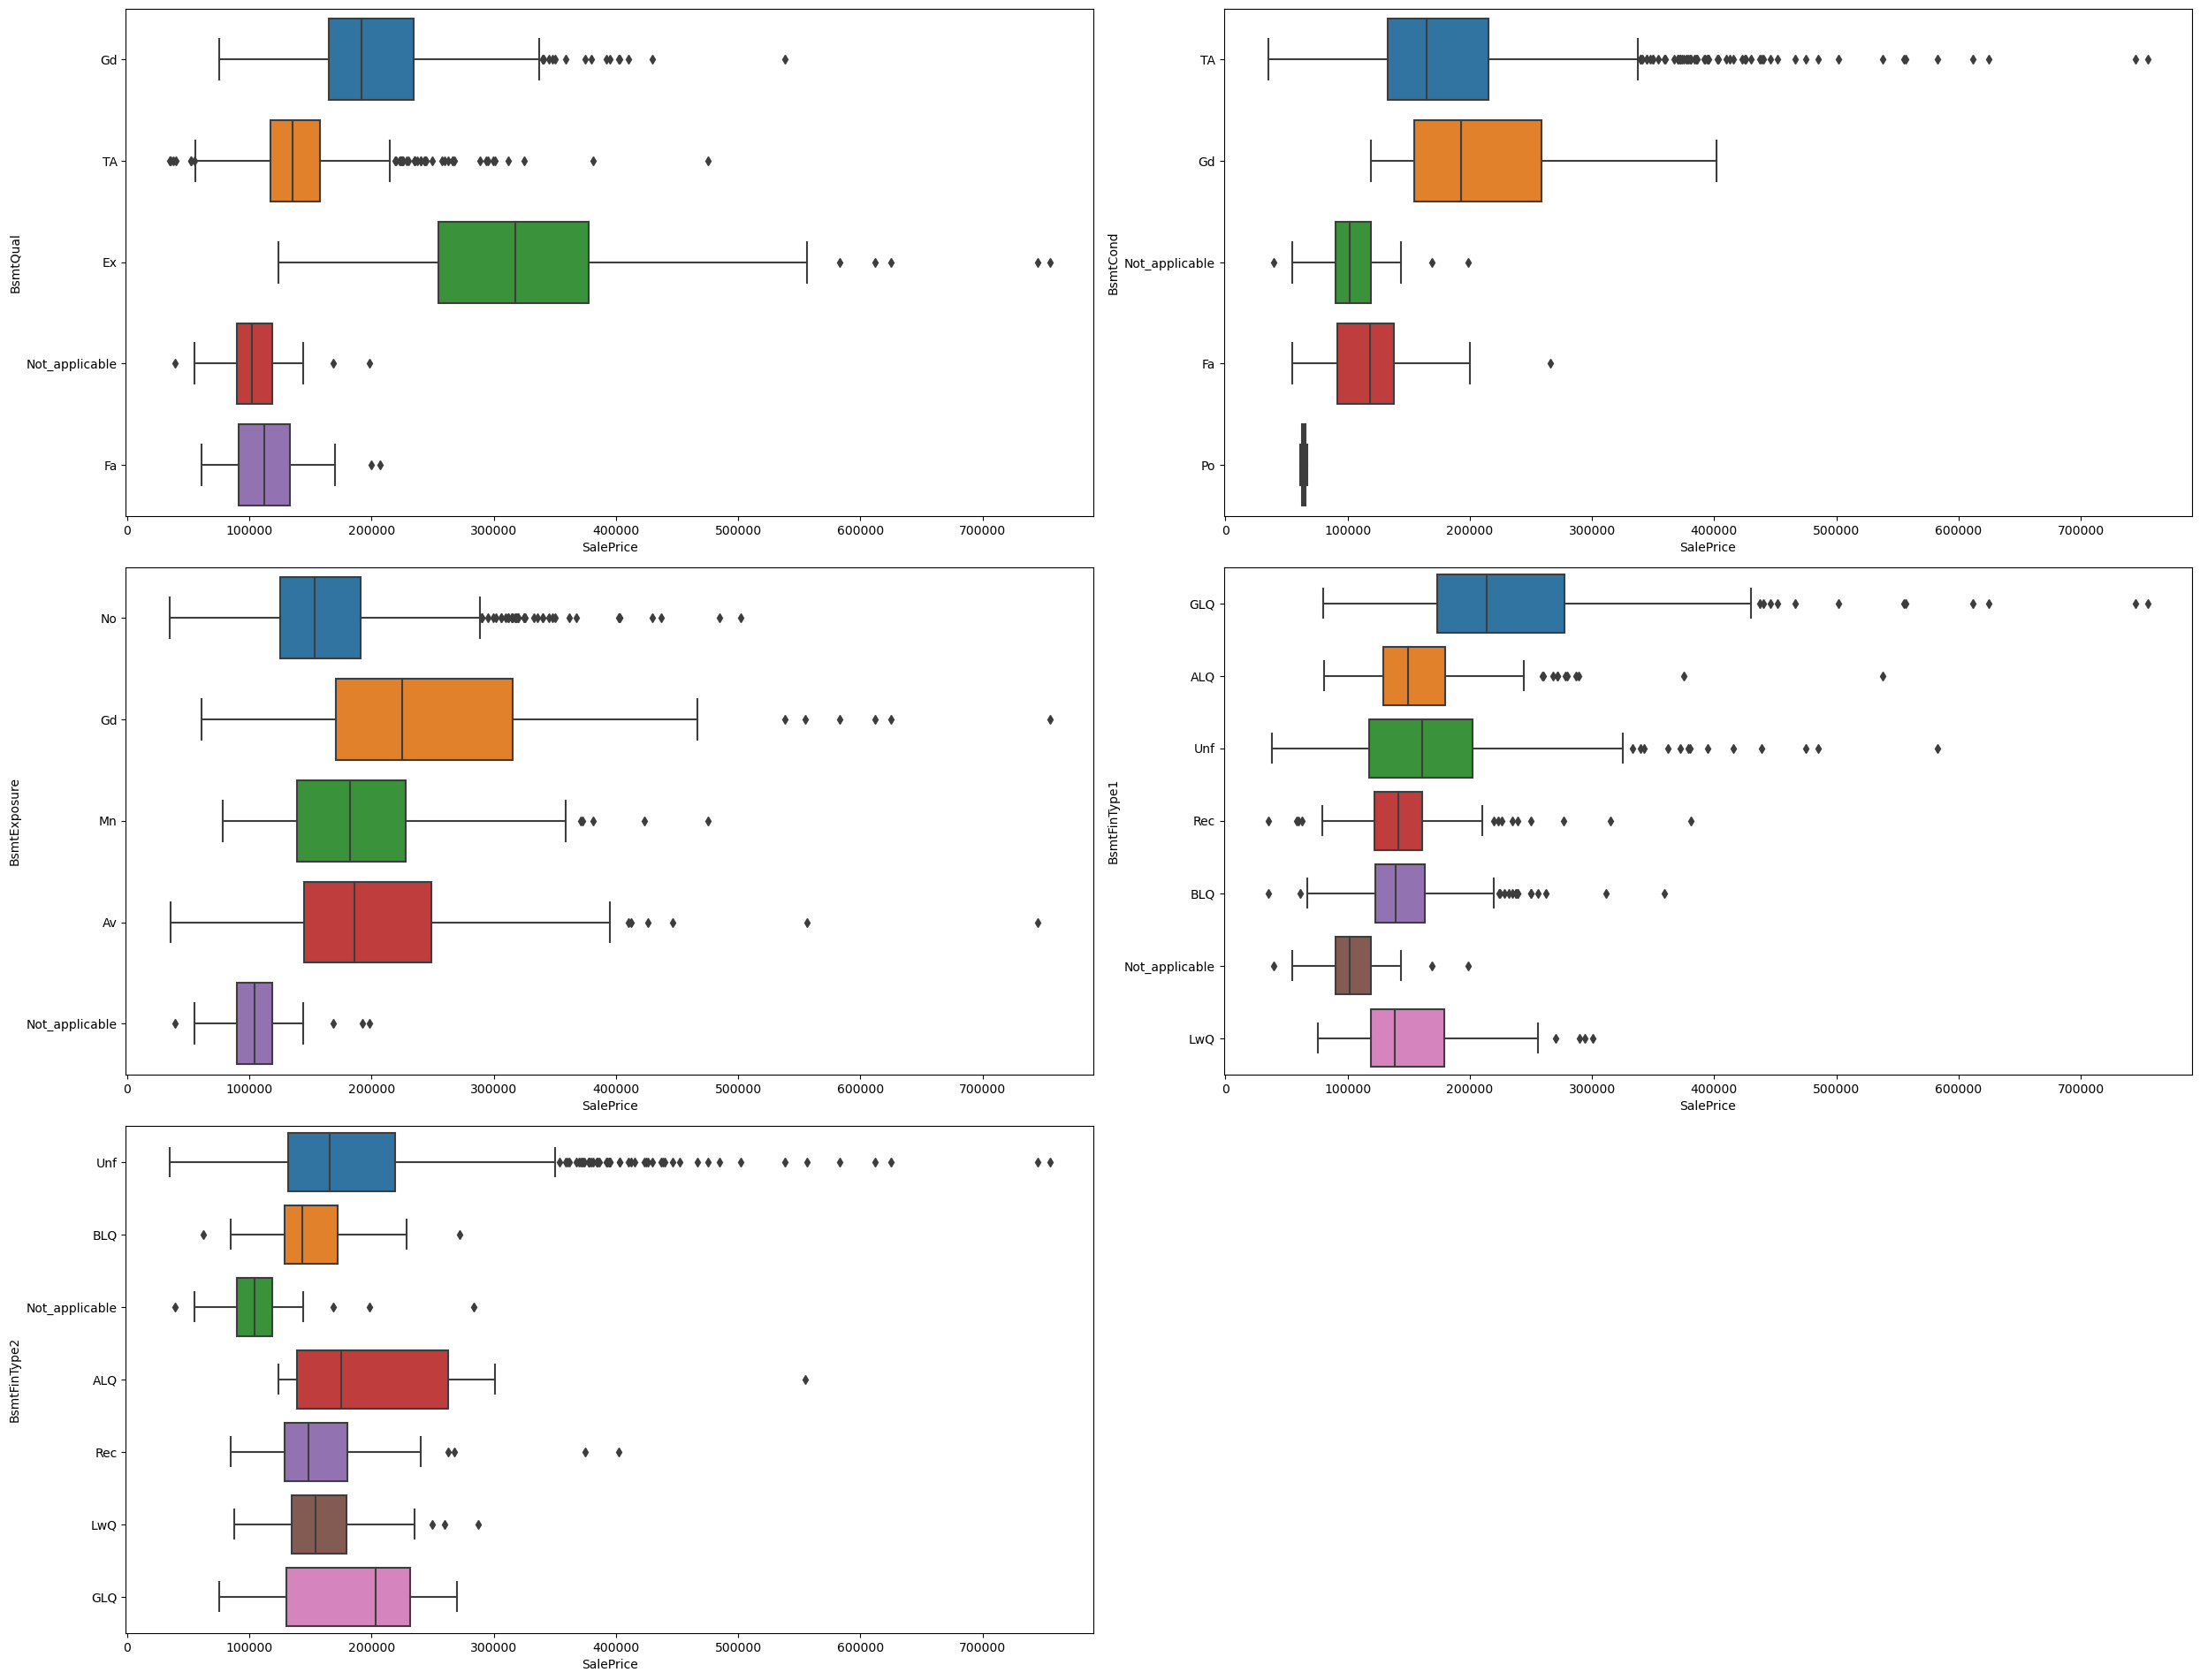

In [47]:
# list of feature 
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Call the function to generate boxplot
gen_boxplot(basement_features)

**Observations**

- `BsmtQual` : Houses with excellent quality basement have the highest SalePrice
- `BsmtFinType1` : Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice

#### Encoding Categorical Features 

In [48]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [49]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


#### Analyzing Unordered Featues

In [50]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

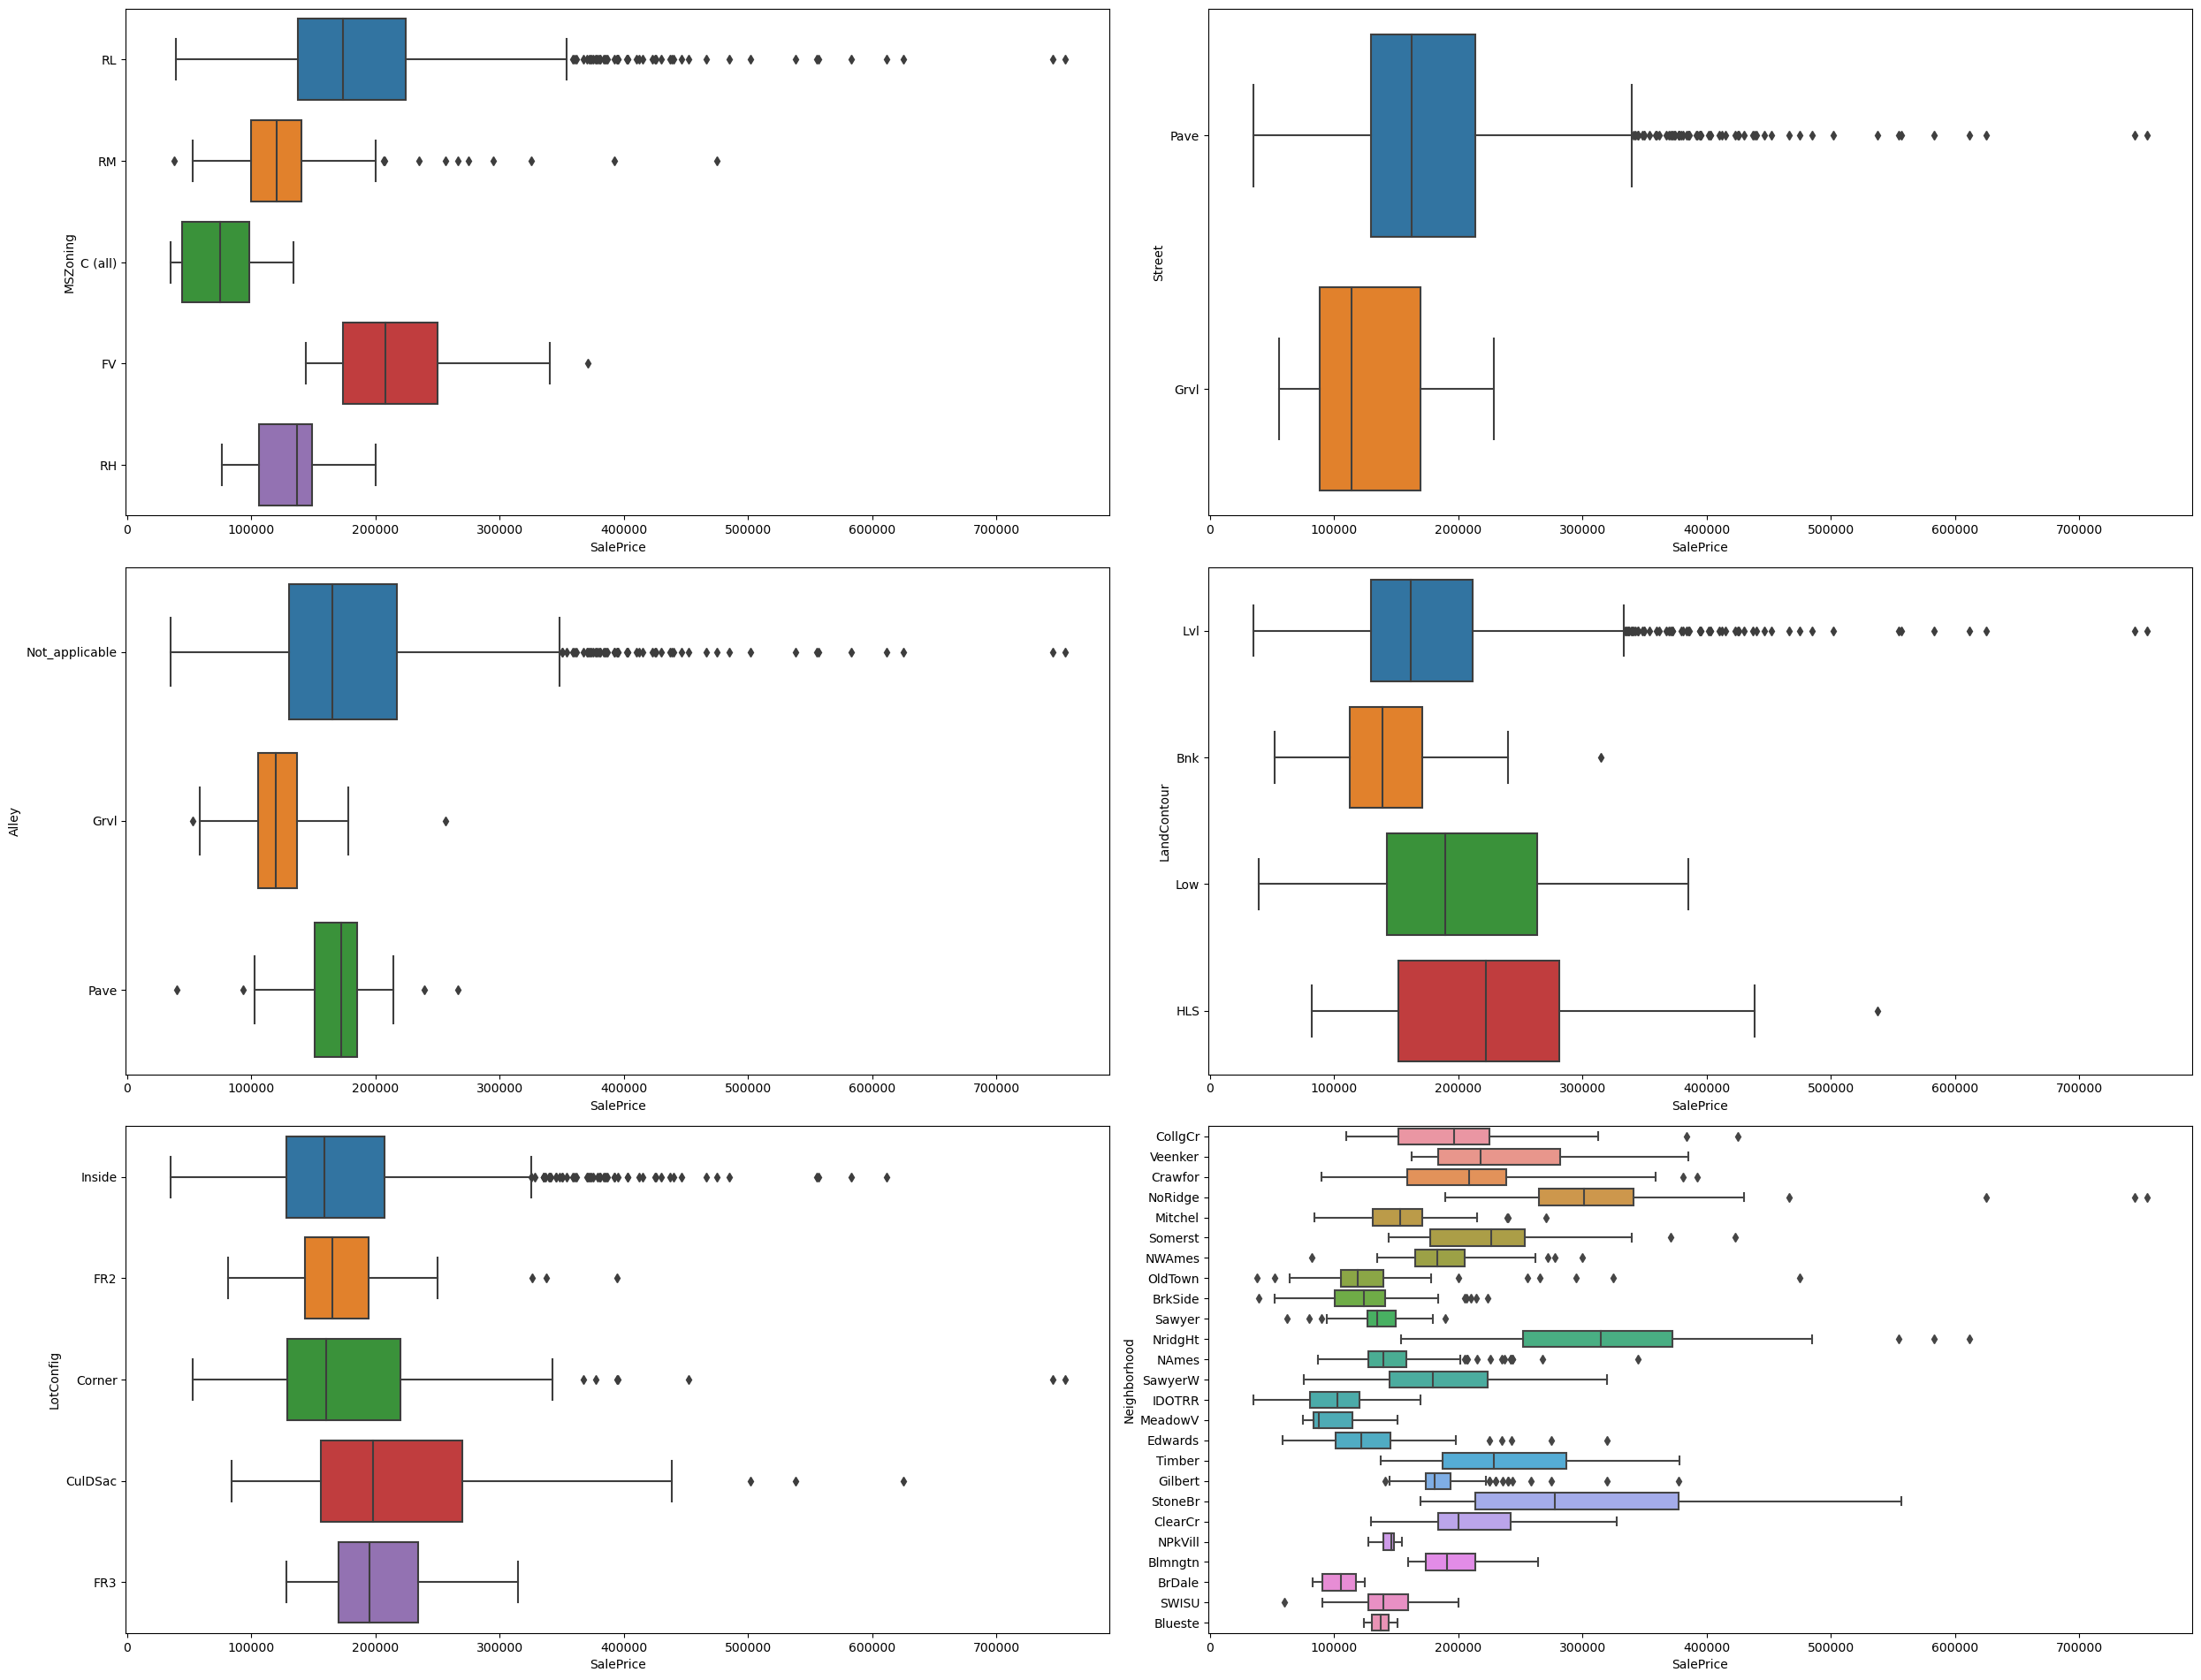

In [51]:
# Call the function to generate boxplot
gen_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

In [52]:
# Function to create Bar chart
def gen_barplot(feature_list):
    fig=plt.subplots(figsize=(12, 24))
    for i, feature in enumerate(feature_list):
        plt.subplot(9, 3, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'])
        plt.tight_layout()

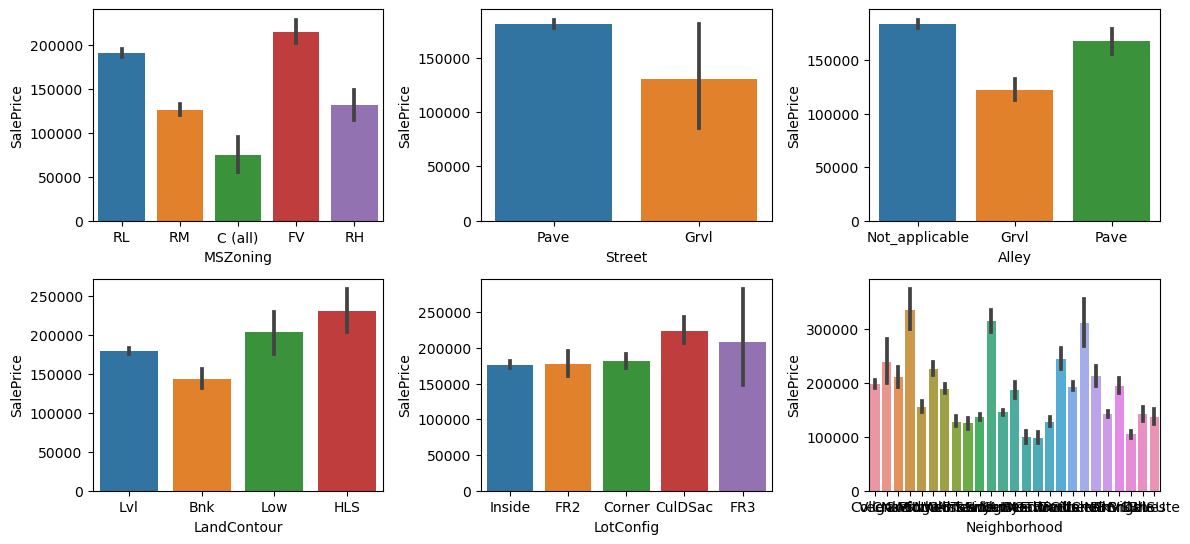

In [53]:
gen_barplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Observations**

- `Street` : Paved type road access to property has highest SalePrice
- `Alley` : Most of the houses do not have alley
- `MSZoning` : Houses classified as MSZoning = FV or Floating Village Residential have the highest SalePrice



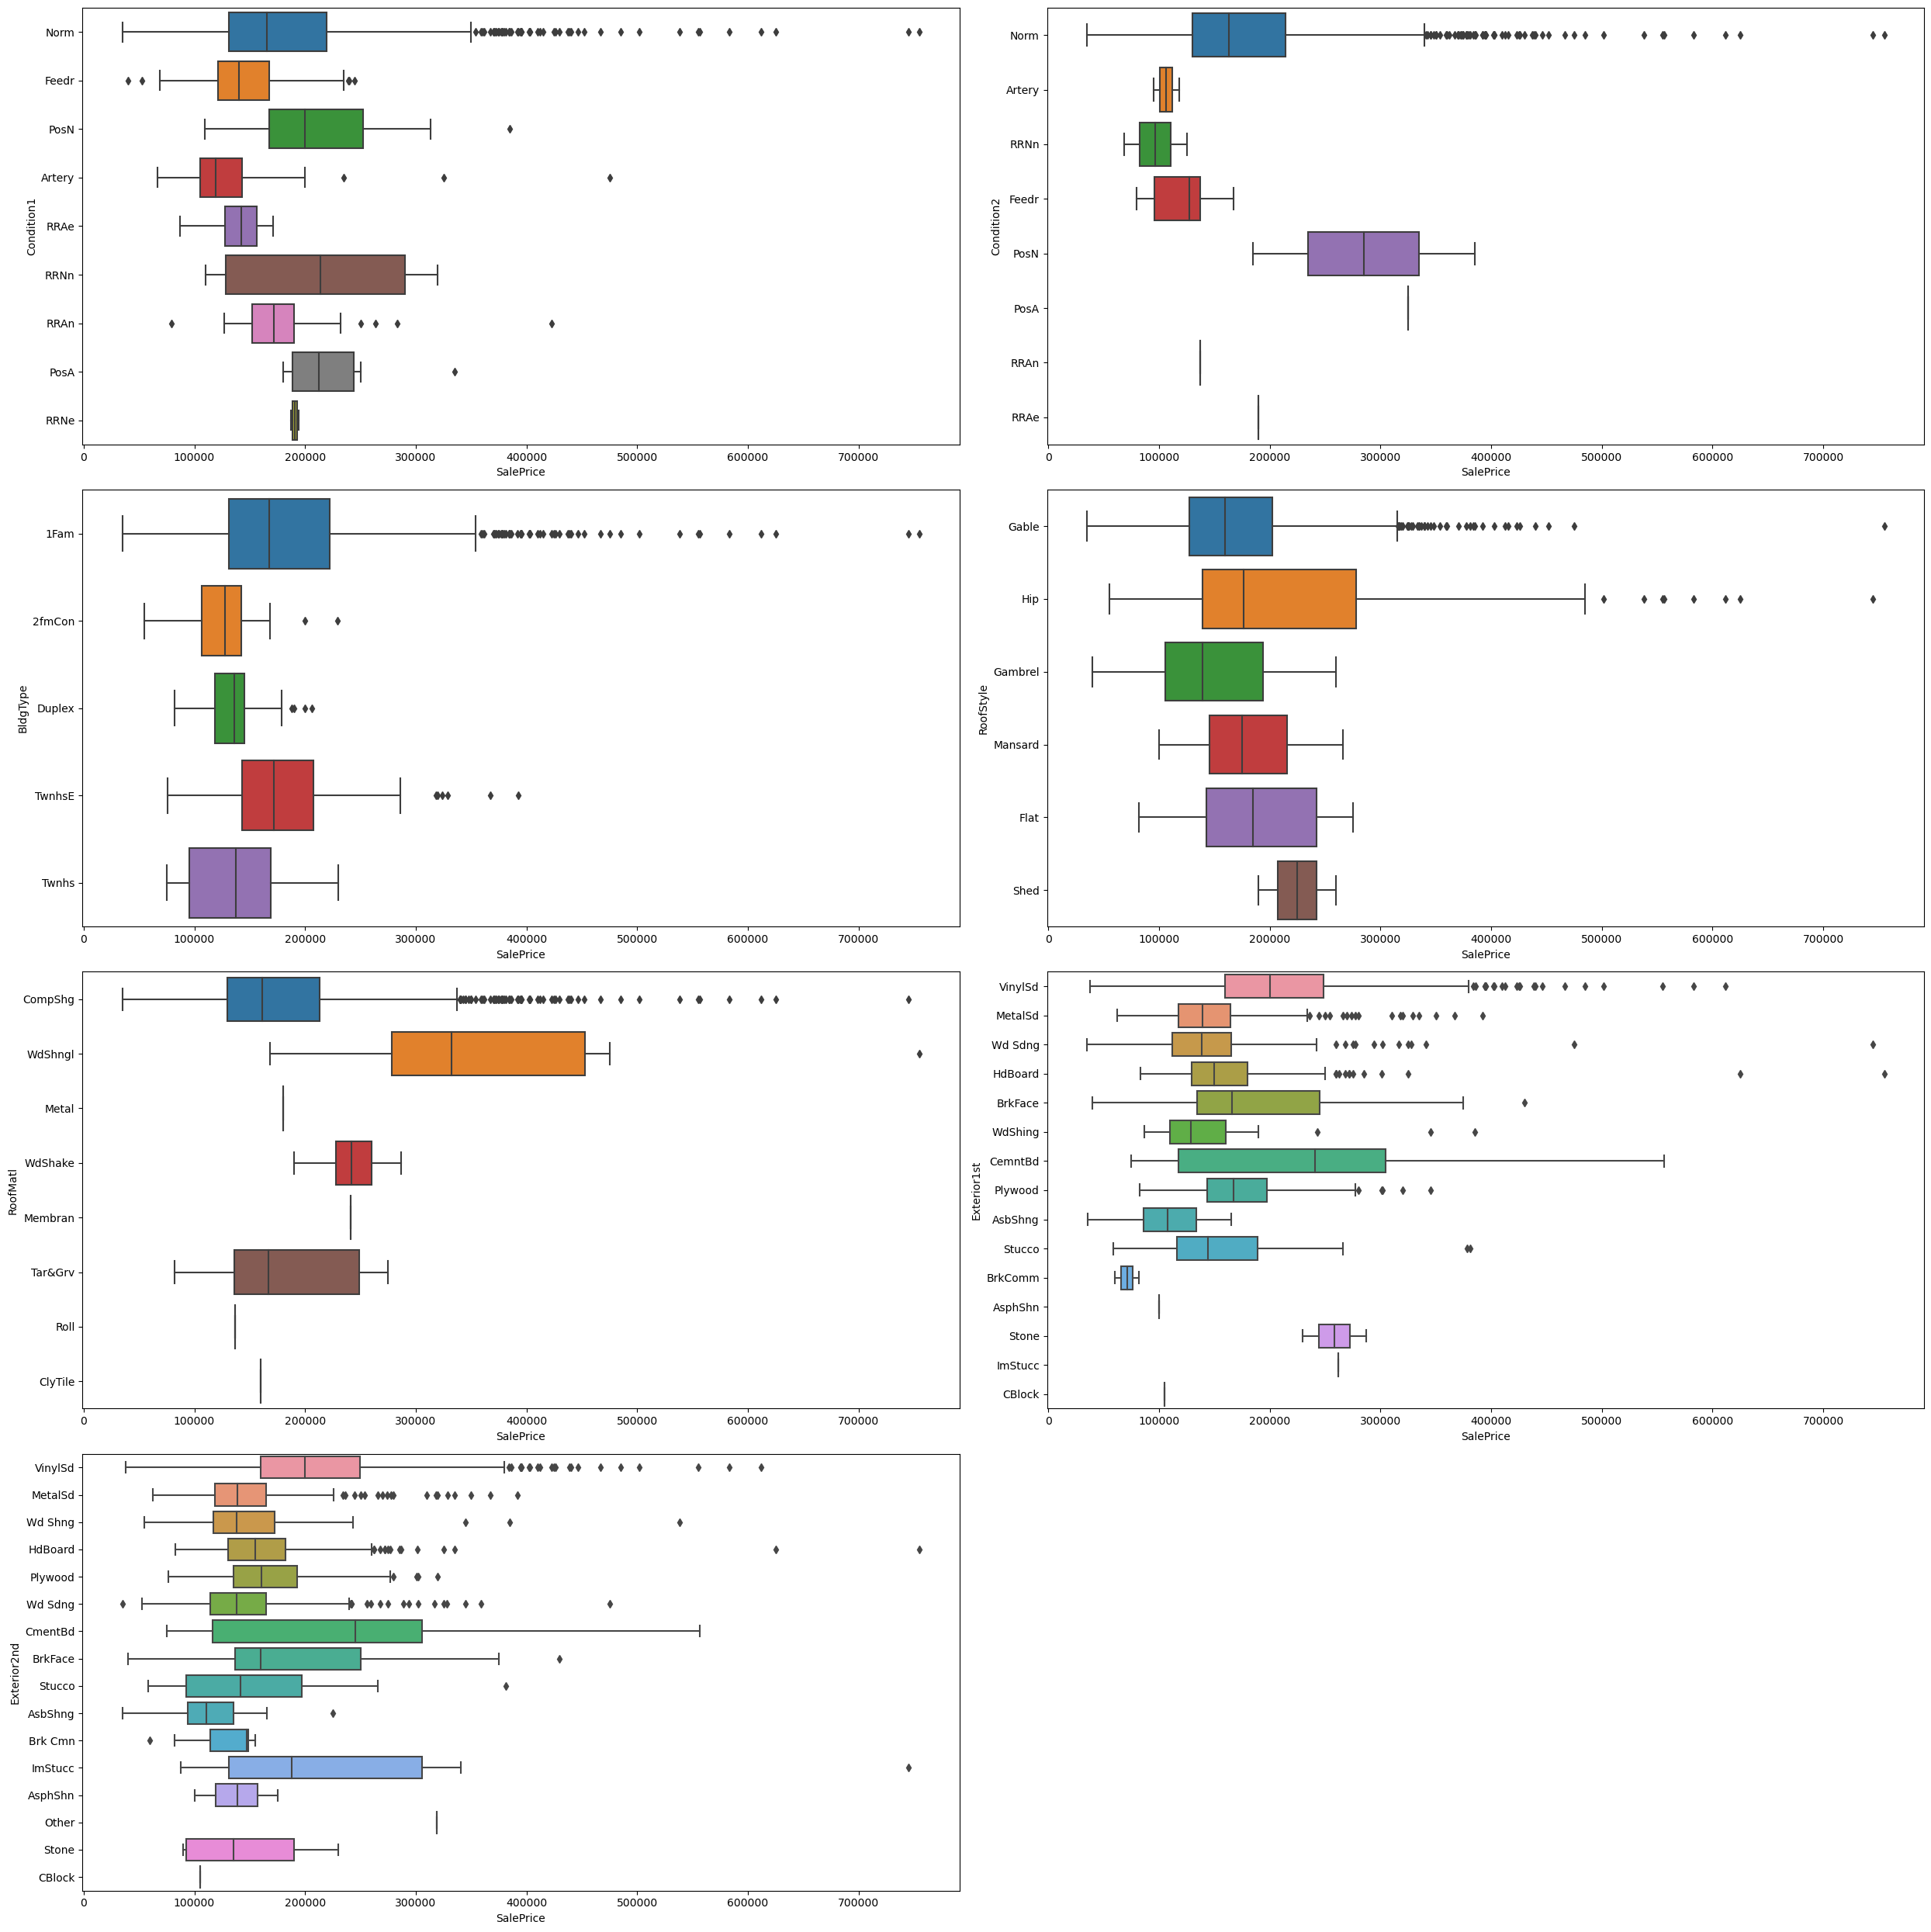

In [54]:
gen_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd'])

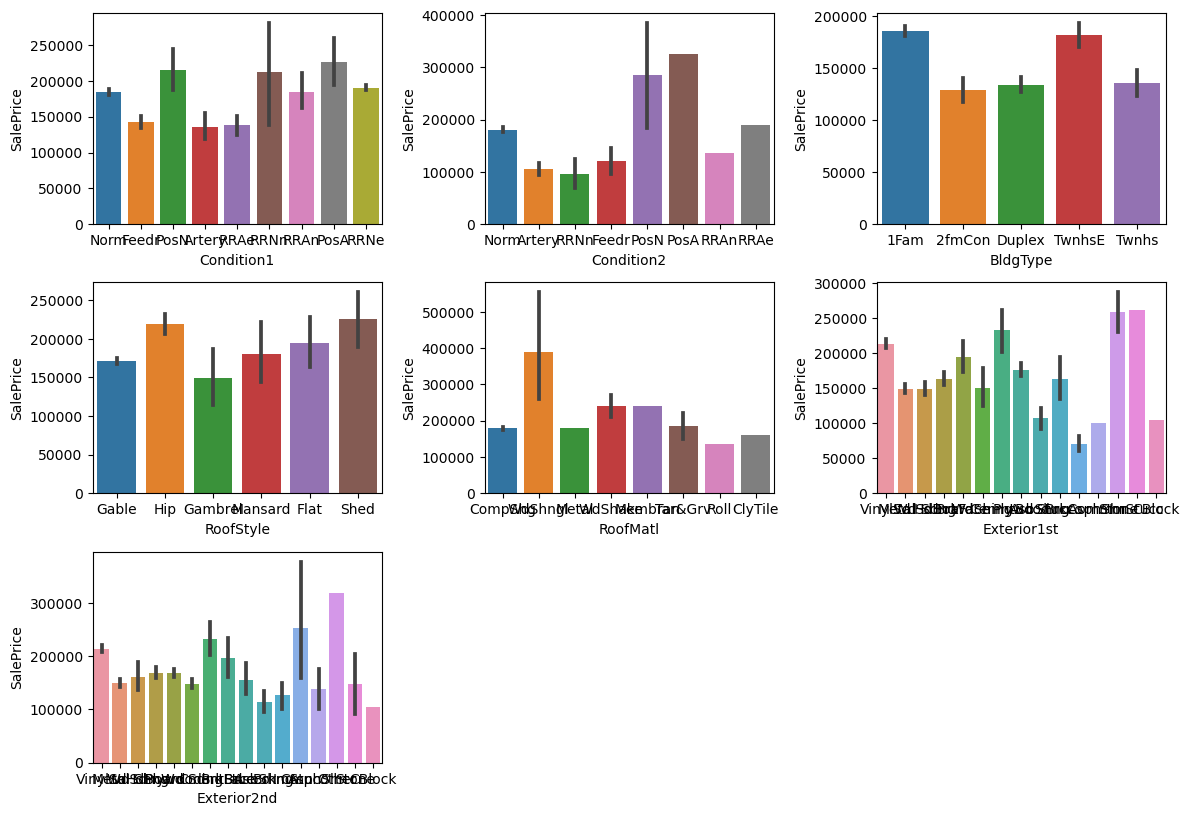

In [55]:
gen_barplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Observations**
- `Condition1` , `Condition2` : Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice

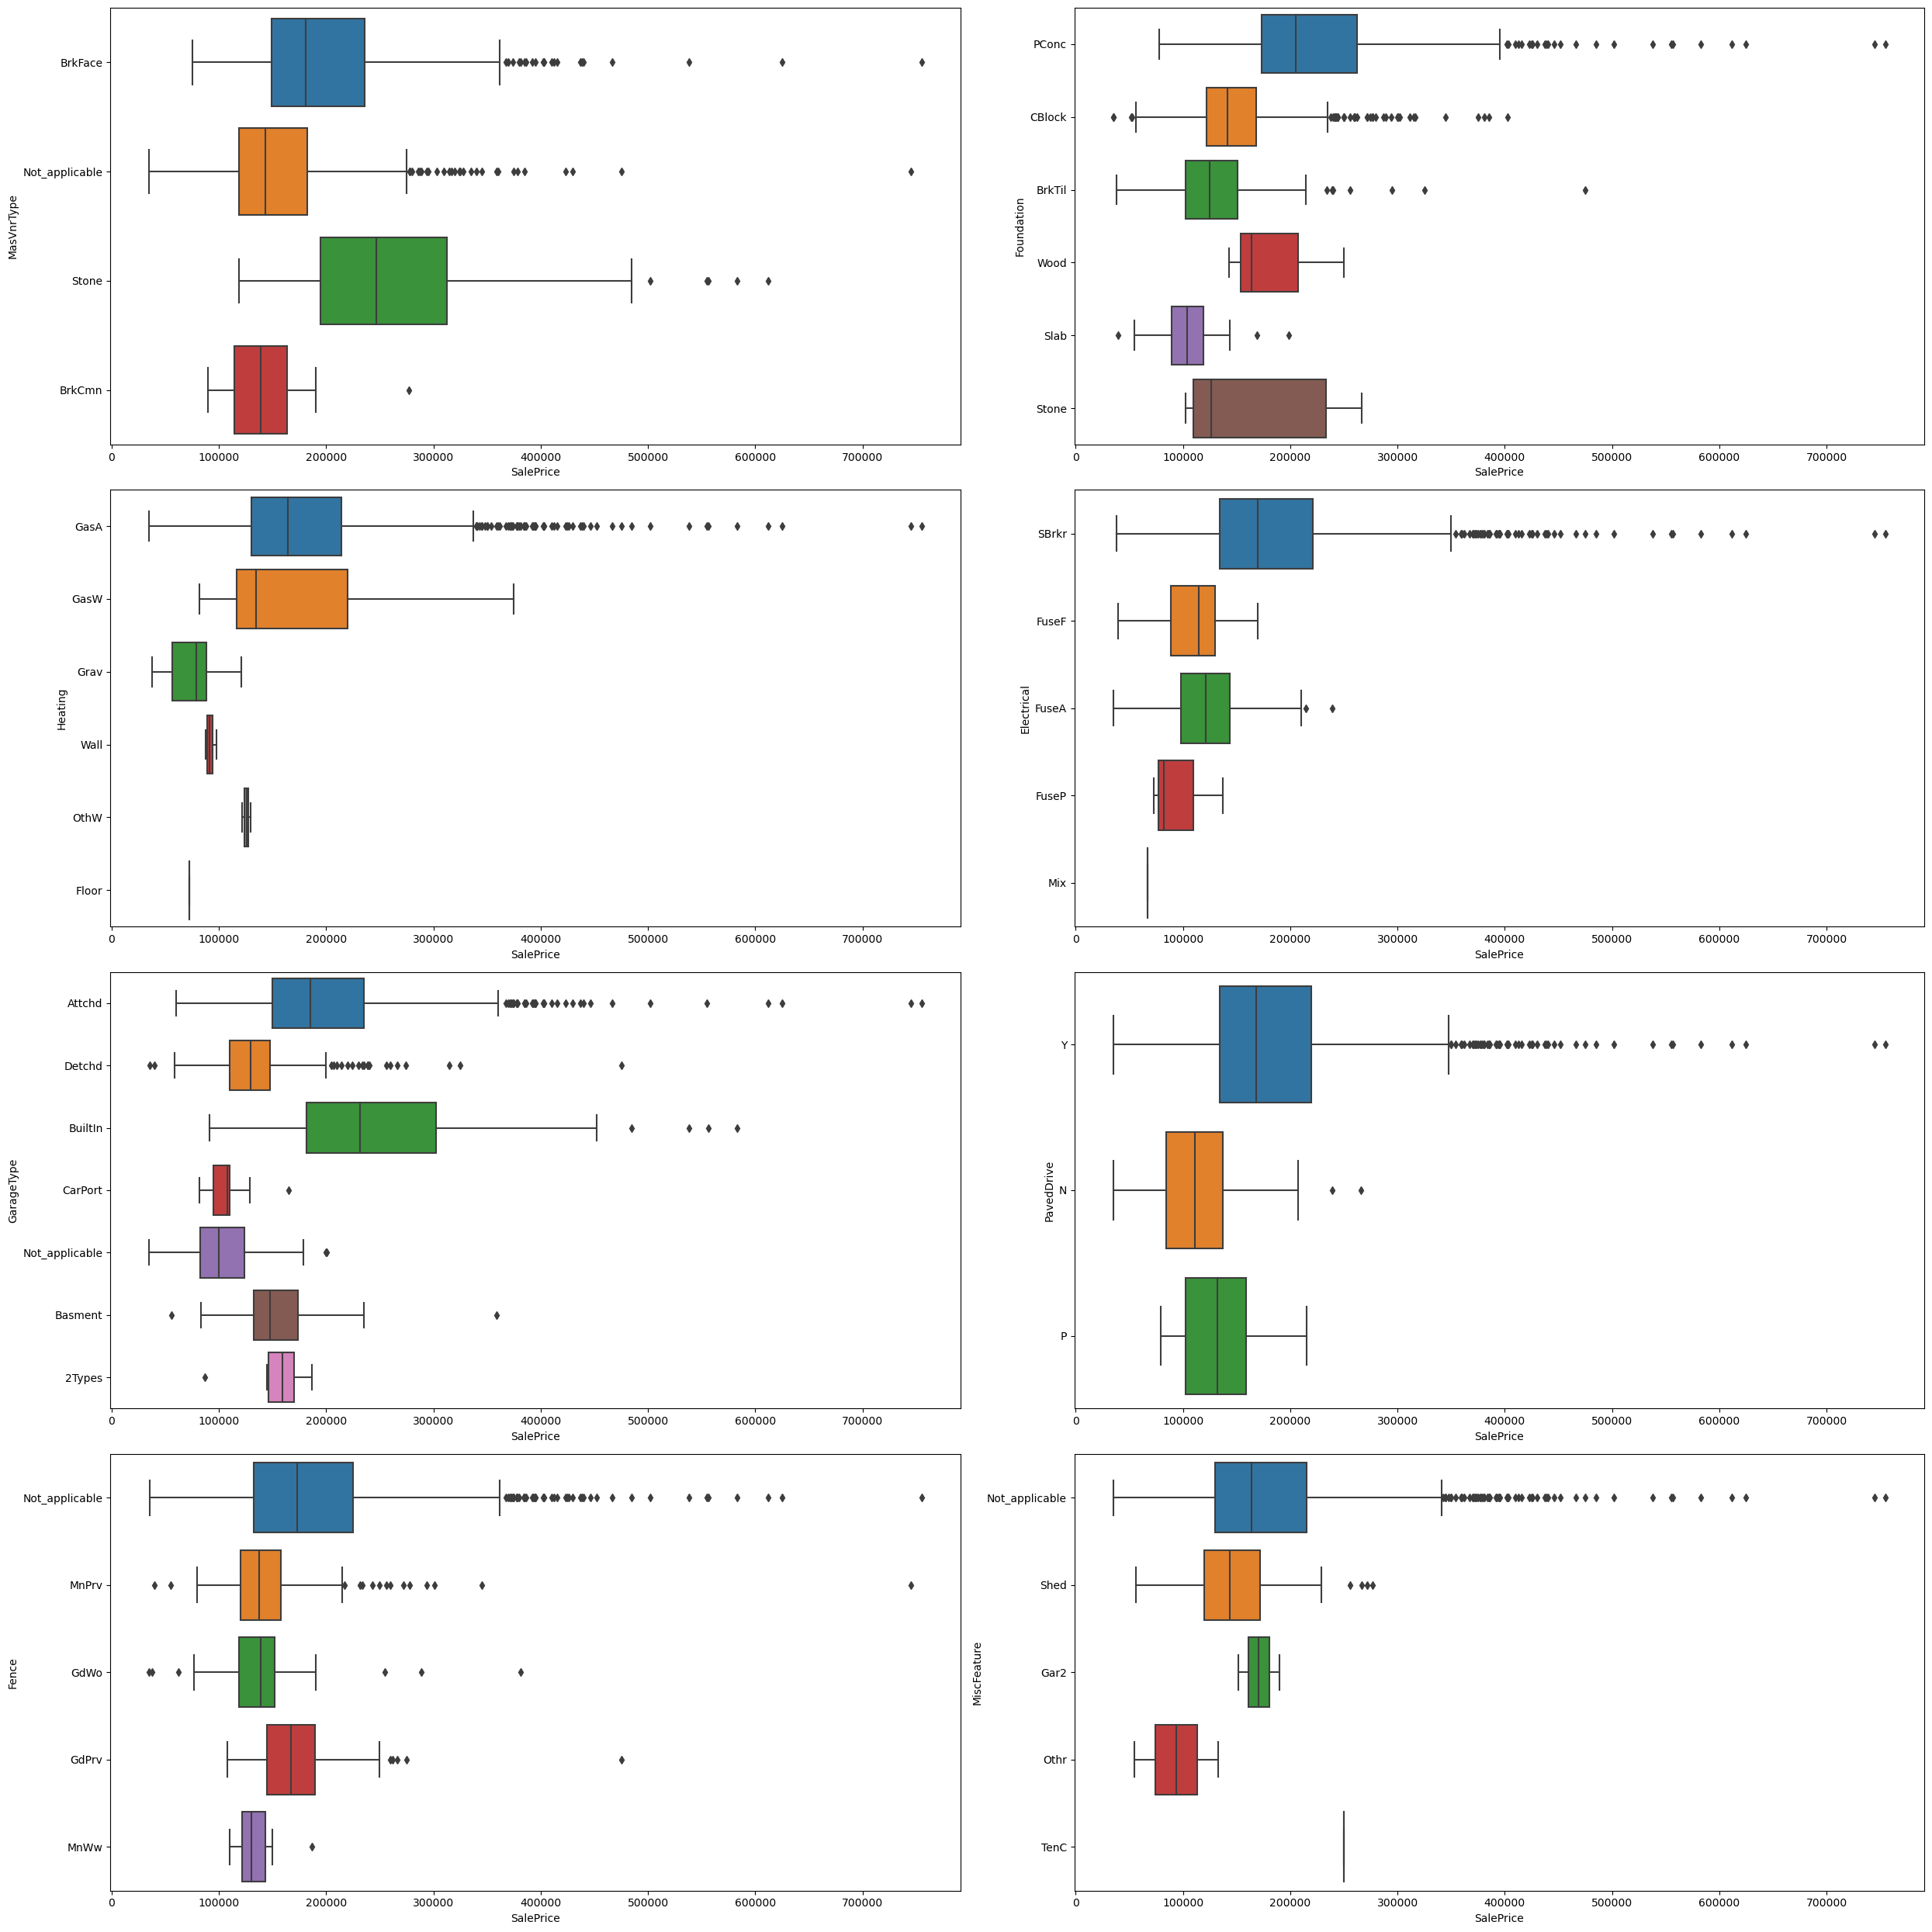

In [56]:
gen_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Observations**

- `Foundation` : Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- `GerageType` : Houses with attached and built-in garage have high SalePrice
- `PavedDrive` : House with Paved driveway has high SalePrice
- `Fence` : Most of the houses do not have fence (Fence= Not_applicable)
- `MiscFeature` : Most of the houses have not any Miscellaneous feature

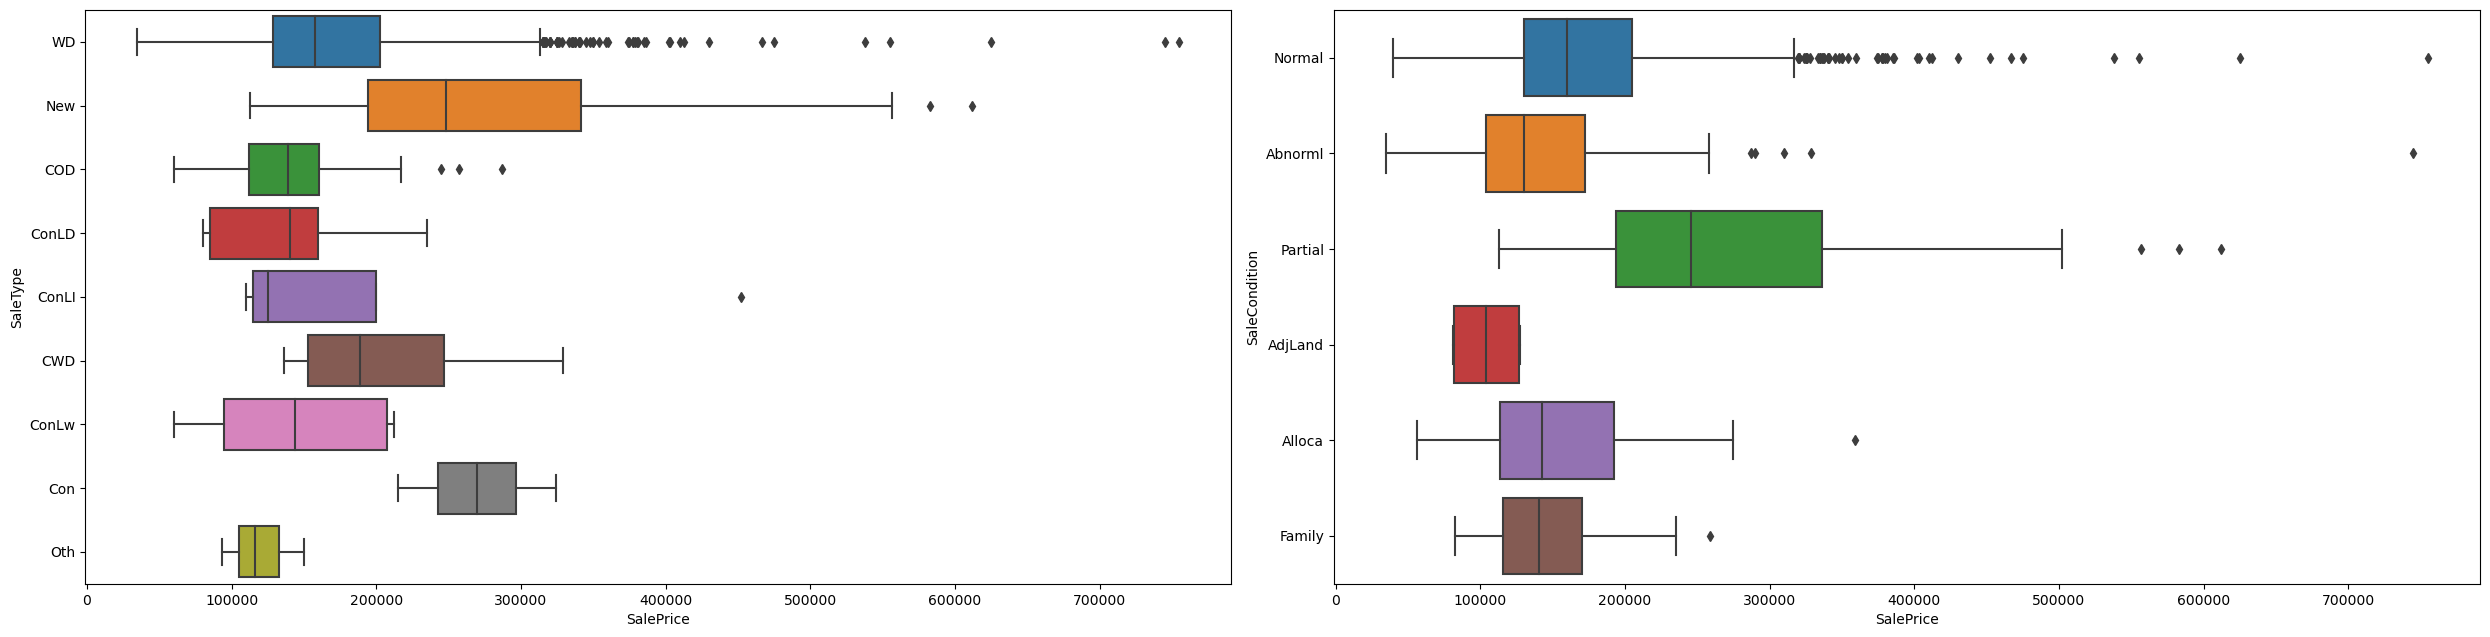

In [57]:
gen_boxplot(['SaleType','SaleCondition'])

**Observations**

- `SaleType` : Most of the houses are newly built, houses with warranty deed have high SalePrice
- `SaleCondition` : Partial Sale condition leads to high SalePrice

#### Encoding Categorical Variables

In [58]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [59]:
dummy_df.shape

(1451, 144)

**Observations**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [60]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_A

In [61]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
print(dummy_df.shape)

(1451, 47)


In [62]:
housing_df.shape

(1451, 66)

In [63]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

In [64]:
# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [65]:
housing_df.shape

(1451, 90)

## Step 4 - Splitting into Train and Test Data

In [66]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_RL,MSZoning_RM,Alley_Not_applicable,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_Not_applicable,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,18,196.0,3,2,4,3,1,6,706.0,1,150.0,4,1,856.0,854,1.0,2,1,3.0,3,8,0,0.0,0,2,548.0,3,3,0,61,2,13,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False,False,True,False,True,False,True,True,False
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,45,0.0,2,2,4,3,4,5,978.0,1,284.0,4,1,1262.0,0,0.0,2,0,3.0,2,6,0,1.0,3,2,460.0,3,3,298,0,5,14,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,True,False,False,False,True,False,True,False,True,True,False
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,19,162.0,3,2,4,3,2,6,486.0,1,434.0,4,1,920.0,866,1.0,2,1,3.0,3,6,0,1.0,3,2,608.0,3,3,0,42,9,13,True,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False,False,True,False,True,False,True,True,False
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,51,0.0,2,2,3,4,1,5,216.0,1,540.0,3,1,961.0,756,1.0,1,0,3.0,3,7,0,1.0,4,1,642.0,3,3,0,35,2,15,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,21,350.0,3,2,4,3,3,6,655.0,1,490.0,4,1,1145.0,1053,1.0,2,1,4.0,3,9,0,1.0,3,2,836.0,3,3,192,84,12,13,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False,False,True,False,True,False,True,True,False


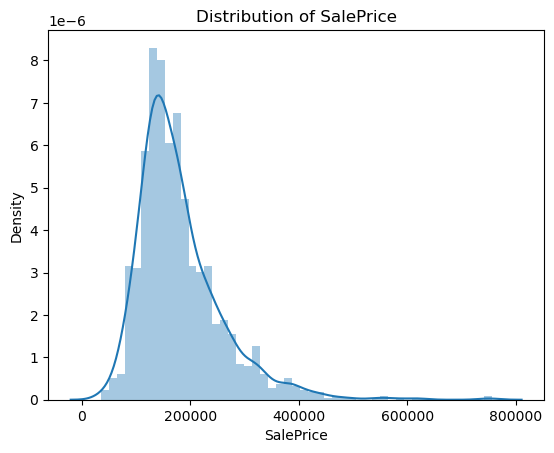

In [67]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

**Observation** Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

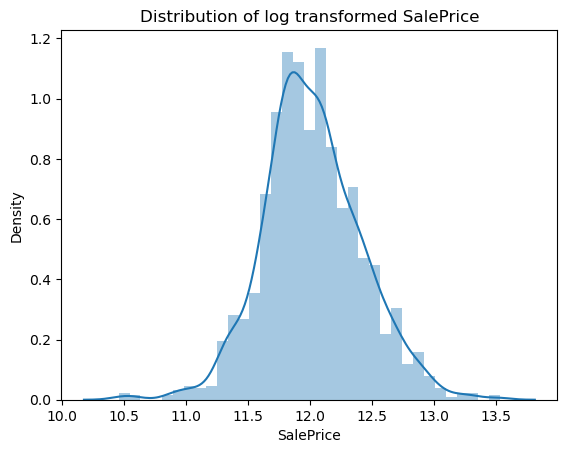

In [68]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

**Observation** : log transformed SalePrice is normally distributed

In [69]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [70]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 89)
(436, 89)
(1015,)
(436,)


In [72]:
# Checking the null in X train test data of 'LotFrontage'
X['LotFrontage'].isnull().any()

True

In [73]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.
# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [74]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [75]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

## Step 5 -  Feature Scaling

In [76]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [77]:
X_tr_scaled = pd.DataFrame(data=scale.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=scale.transform(X_test), columns=X_test.columns)

In [78]:
# Checking the features after sacling

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.682397    -1.620221 -1.336592  0.752218   0.031404  -0.218261   
1       0.924951     0.000000 -0.712130 -1.382454   0.031404  -0.218261   
2       1.728625    -0.279927 -1.116407 -1.382454   0.031404   3.473991   
3       0.657060     0.892830  1.069488  0.752218   0.031404  -0.218261   
4      -0.950289     0.501911 -0.072840 -1.382454   0.031404  -0.218261   
...          ...          ...       ...       ...        ...        ...   
1010   -0.950289     1.227904  0.754459 -1.382454   0.031404  -0.218261   
1011   -0.950289    -0.056544  2.265114 -1.382454   0.031404  -0.218261   
1012    1.728625     0.000000 -1.204817 -1.382454   0.031404   3.473991   
1013   -0.146614    -0.503309  0.241349  0.752218   0.031404  -0.218261   
1014    0.121277     0.055147 -0.329395  0.752218   0.031404  -0.218261   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      -0.863197    -1.55245

## Step 6 -  Initial Feature Selection with RFE

In [79]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(estimator=linear_m,n_features_to_select=n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [80]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Not_applicable', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Not_applicable', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC',

In [81]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [82]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     212.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:16:13   Log-Likelihood:                 699.68
No. Observations:                1015   AIC:                            -1307.
Df Residuals:                     969   BIC:                            -1081.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:16:13   Log-Likelihood:                 704.03
No. Observations:                1015   AIC:                            -1306.
Df Residuals:                     964   BIC:                            -1055.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [84]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:16:13   Log-Likelihood:                 706.20
No. Observations:                1015   AIC:                            -1300.
Df Residuals:                     959   BIC:                            -1025.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observation** 
- By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, models with 45, 50 and 55 features have the same adjusted R-squared value on the training data(Adj. R-squared = 0.904).

In [85]:
top_50 = top_n_features(50)

Top 50 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Not_applicable', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Not_applicable', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [86]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

## Step 7 -  Ridge Regression

In [87]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator = estimator_model, 
        param_grid = params, 
        scoring= 'neg_mean_absolute_error', 
        cv = 5, 
        return_train_score=True,
        verbose = 1)            
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_

    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
 
    # Model Evaluation
    print(model," Regression with ",alpha)
    print("===================================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test) : ',r2_score(y_test,y_test_pred))
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred

In [88]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9082161165128747
R2 score (test) :  0.9028399605761104
RMSE (train) :  0.12127004854480684
RMSE (test) :  0.12374911605573792


**Observations** 
- Ridge Regression model was able to achieve R2 score of 0.9028 on test data i.e. 90% of the variance in test data can be explained by the model.
- Root Mean Square Error = 0.1237 on test data, that means the prediction made by the model can off by 0.123 unit.
- Optimum alpha for ridge is 20.0

## Step 8 -  Lasso Regression

In [89]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9077451204811589
R2 score (test) :  0.9031186604504103
RMSE (train) :  0.12158080366266924
RMSE (test) :  0.12357150378155785


**Observations** 
- Lasso Regression model was able to achieve R2 score of 0.9031 on test data i.e. 90% of the variance in test data can be explained by the model.
- Root Mean Square Error = 0.123 on test data, that means the prediction made by the model can off by 0.123 unit.
- Optimum alpha for lasso is 0.001

## Step 9 -  Comparing Model Coefficients

In [90]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20),Lasso (alpha=0.001)
LotArea,0.035885,0.033862
OverallQual,0.087830,0.090696
OverallCond,0.044271,0.044980
YearBuilt,-0.017699,-0.019276
YearRemodAdd,-0.012329,-0.011493
BsmtQual,0.012900,0.012350
BsmtExposure,0.011449,0.010615
BsmtFinType1,0.009392,0.009074
BsmtFinSF1,0.025347,0.025426
HeatingQC,0.012433,0.011962


In [91]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[135942 233486 165113 128495 178455]


## Step 10 -  Final Model

- Ridge Regression R2 score(test) = 0.9028399605761104
- Lasso Regression R2 score(test) = 0.9031186604504103
- `Lasso Regression` produced slightly high R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [92]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.138275
2ndFlrSF,0.111747
OverallQual,0.090696
OverallCond,0.044980
LotArea,0.033862
SaleCondition_Normal,0.030542
SaleType_New,0.028795
MSZoning_RL,0.027917
BsmtFinSF1,0.025426
Condition1_Norm,0.025237


In [93]:
# Top 10 features
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea',
       'SaleCondition_Normal', 'SaleType_New', 'MSZoning_RL', 'BsmtFinSF1',
       'Condition1_Norm'],
      dtype='object')

## Summary
* SalePrice is the target column
* Data divided in to numerical and categorical
* Top 50 features are selected through RFE and adjusted R-square
    * Top 50 feature are : 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Not_applicable', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Not_applicable', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial'
* Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 20.0 for ridge and 0.001 for lasso model.
* Model evaluation is done with R2 score and Root Mean Square Error.
* Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.
* The top 10 features, ranked by descending importance, in the final model out of a total of 50 features are as follows:
    1. 1stFlrSF
    2. 2ndFlrSF
    3. OverallQual
    4. OverallCond
    5. SaleCondition_Partial
    6. LotArea
    7. BsmtFinSF1
    8. SaleCondition_Normal
    9. MSZoning_RL
    10. Neighborhood_Somerst
* The table displays the model coefficients alongside their respective features. 
    * For instance, a unit change in the feature `1stFlrSF` will result in a change of 0.138275 in the natural log of SalePrice, assuming all other features remain constant. 
    * Similarly A negative coefficient indicates a negative correlation between the predictor and the target variable. for example : a unit change in the feature `Functional` will result in a change of -0.022718 in the natural log of SalePrice, assuming all other features remain constant. 
* The predicted value of SalePrice is transformed back into its original scale by performing an antilogarithm operation.

## Assignment Part - 2

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### optimal value of alpha for ridge regression = 20.0
#### optimal value of alpha for lasso regression = 0.001

In [94]:
# Ridge regression Model Building with alpha = 40

ridge_model = Ridge(alpha=40) # 20*2 = 40
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha = 40")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha = 40
R2 score (train) :  0.9074
R2 score (test) :  0.9034
RMSE (train) :  0.1218
RMSE (test) :  0.1234


In [95]:
# Lazzo regression Model Building with alpha = 0.002

lasso_model = Lasso(alpha=0.002) # 0.001*2 = 0.002
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9069
R2 score (test) :  0.9039
RMSE (train) :  0.1221
RMSE (test) :  0.1231


In [96]:
model_coefficients['Ridge (alpha = 40)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40),Lasso (alpha = 0.002)
LotArea,0.035885,0.033862,0.036941,0.033809
OverallQual,0.087830,0.090696,0.087176,0.092196
OverallCond,0.044271,0.044980,0.042669,0.042953
YearBuilt,-0.017699,-0.019276,-0.015454,-0.018353
YearRemodAdd,-0.012329,-0.011493,-0.013574,-0.012742
BsmtQual,0.012900,0.012350,0.013715,0.013088
BsmtExposure,0.011449,0.010615,0.011200,0.009809
BsmtFinType1,0.009392,0.009074,0.009304,0.008548
BsmtFinSF1,0.025347,0.025426,0.025575,0.025822
HeatingQC,0.012433,0.011962,0.012975,0.012723


In [97]:
model_coefficients.sort_values(by='Ridge (alpha = 40)', ascending=False).head(5)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40),Lasso (alpha = 0.002)
1stFlrSF,0.133031,0.138275,0.126582,0.135743
2ndFlrSF,0.108561,0.111747,0.102397,0.108855
OverallQual,0.087830,0.090696,0.087176,0.092196
OverallCond,0.044271,0.044980,0.042669,0.042953
LotArea,0.035885,0.033862,0.036941,0.033809


In [98]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(5)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40),Lasso (alpha = 0.002)
1stFlrSF,0.133031,0.138275,0.126582,0.135743
2ndFlrSF,0.108561,0.111747,0.102397,0.108855
OverallQual,0.087830,0.090696,0.087176,0.092196
OverallCond,0.044271,0.044980,0.042669,0.042953
LotArea,0.035885,0.033862,0.036941,0.033809


### Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [99]:
# Ridge regression Model Building with alpha = 40

ridge_model = Ridge(alpha=40)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha = 40")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha = 40
R2 score (train) :  0.9074
R2 score (test) :  0.9034
RMSE (train) :  0.1218
RMSE (test) :  0.1234


In [100]:
# Lasso regression Model Building with alpha = 0.002

lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9069
R2 score (test) :  0.9039
RMSE (train) :  0.1221
RMSE (test) :  0.1231


**Observations**
- Ridge regression : R2 score of test is 0.9034
- Lasso regression : R2 score of test is 0.9039
- Lasso Regression produced slightly high R2 score on test data than Ridge Regression. Choosing Lasso as the final model. 

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [101]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 40),Lasso (alpha = 0.002)
1stFlrSF,0.133031,0.138275,0.126582,0.135743
2ndFlrSF,0.108561,0.111747,0.102397,0.108855
OverallQual,0.087830,0.090696,0.087176,0.092196
OverallCond,0.044271,0.044980,0.042669,0.042953
LotArea,0.035885,0.033862,0.036941,0.033809


In [102]:
# Removing the above top 5 feature from train and test data

X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea'], axis=1)
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea'], axis=1)

In [103]:
# Lasso regression Model Building with alpha = 0.001, excluding top 5 feature.

alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [104]:
# Top 5 feature in lasso model now

model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
GarageArea,0.103335
FireplaceQu,0.073160
KitchenQual,0.058781
BsmtFinSF1,0.054331
HalfBath,0.048404


### Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

- Model robustness is the model’s ability to withstand uncertainties and perform accurately in different contexts.Ensuring the robustness and generalizability of a machine learning model involves several key steps:
    * **Diverse Training Data** : Use a large and diverse dataset that represents the problem space well. This helps the model learn various patterns and reduces overfitting.
    * **Regularization**: Apply regularization methods to prevent the model from becoming too complex and overfitting the training data.
    * **Cross-Validation**: Implement cross-validation techniques to evaluate the model's performance on unseen data. This helps in assessing the model's ability to generalize.
    * **Continuous Monitoring**: After deployment, continuously monitor the model's performance to detect any shifts in data distribution or declines in performance over time.
    
- **Implications for Accuracy:**
    * A robust and generalizable model may exhibit slightly lower accuracy on the training set due to its avoidance of overfitting and noise.
    * However, such a model is expected to perform better on real-world data, maintaining high accuracy when faced with new examples not seen during training.
    
- 
The important thing is to make sure the model learns from the training data effectively but also does well with new data it hasn't seen before. This way, the model can be accurate and reliable in different situations.


